# Imports

In [1]:
from pathlib import Path #Allows for easy path conversion to any OS

In [2]:
from XSpect_EW_class import *
from XSpect_EW_func import *

Working


## Define spectra paths

In [3]:
#sun
sun_blue = Path("../spectra_sample/Solar/sunb.fits")
sun_red = Path("../spectra_sample/Solar/sunr.fits")
sun_inf = Path("../spectra_sample/Solar/suni.fits")
#sun_blue = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/spectra/sun/sunb.fits'
#sun_red = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/spectra/sun/sunr.fits'
#sun_inf = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/spectra/sun/suni.fits'

## Create a Spectrum_Data object for a spectrum file
- This loads the file into the class object which will hold all of the spectrum information.
- Normally, you may have just one file, in this case the solar spectrum is spread out over three files. We load them individually and later we will combine them.

In [4]:
%%time
#load files individually, normally this would be done into one object
#but here we have three files for one whole spectrum
sun_b = Spectrum_Data(sun_blue)
sun_r = Spectrum_Data(sun_red)
sun_i = Spectrum_Data(sun_inf)

CRVL stuff not found
CRVL stuff not found
CRVL stuff not found
CPU times: user 153 ms, sys: 8.93 ms, total: 162 ms
Wall time: 204 ms


## object.normalize_all() - Normalizes all orders 
- window_width: Spectrum is split into chunks of this size (in units of input spectrum). Continuum points are chosen within each chunk based on the depth parameter. Window size should be larger than the width of an absorption line so that no points within an absorption line are chosen as part of the continuum.
- continuum_depth (percentile): Within each chunk, points with flux value above the percentile value will be chosen as part of the continuum. Example: depth = 90, points above 90% of all flux values within a window will be selected.

In [5]:
%%time
window_width = 1.6
depth = 90

sun_b.normalize_all(window_width=window_width, continuum_depth=depth)
sun_r.normalize_all(window_width=window_width, continuum_depth=depth)
sun_i.normalize_all(window_width=window_width, continuum_depth=depth)

/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_class.py:80: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(self.flux[order][clipl:clipr])


CPU times: user 55.6 s, sys: 1.81 s, total: 57.5 s
Wall time: 29.5 s


/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_class.py:107: RuntimeWarning: invalid value encountered in true_divide
  self.normalized_flux[order][clipl:clipr] = self.flux[order][clipl:clipr]/pred


## object.check_spectra() 
- prints out a plot of the whole spectrum to view normalization

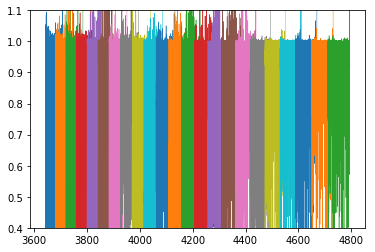

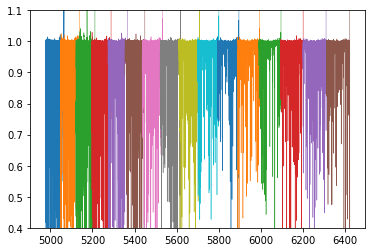

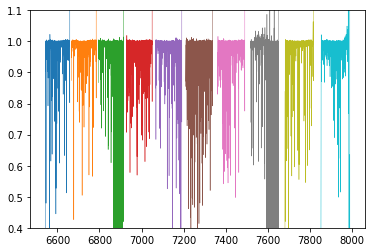

In [6]:
sun_b.check_spectra()
sun_r.check_spectra()
sun_i.check_spectra()

## Combine multiple spectrum objects
- Here we create a new Spectrum_Data() object to use as a shell to combine our previous three files.
- Normally, you likely would not have to worry about this if the whole spectrum is contained within one file.

In [7]:
%%time
#create temporary file to be erased and combined into, must normalize input files first
Sun = Spectrum_Data(sun_blue) 
Sun = combine_files(Sun,[sun_b,sun_r,sun_i])
del sun_b, sun_r, sun_i

CRVL stuff not found
CPU times: user 68.9 ms, sys: 6.33 ms, total: 75.3 ms
Wall time: 83 ms


## object.normalize() - Normalize specific region of spectrum
- order: select which order within the spectrum to normalize
- window_width and continuum depth: defined above
- clip: wavelength values to normalize within with current parameters

## Attributes of the Spectrum_Data object
- We can access important information about the spectrum like the wavelength, shifted_wavelength, flux, normalized_flux, and others.
- We can also see which points were selected as part of the continuum and use those points as a mask on the spectrum as we see below.

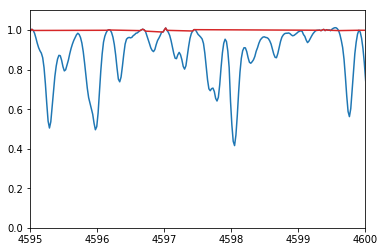

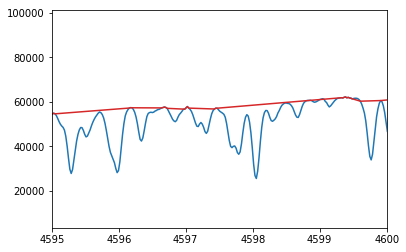

In [8]:
order = 20
window_width = 1.6
continuum_depth = 90
clip = [4598,4600]

#Normalized Flux
Sun. normalize(order,window_width,continuum_depth, clip)
plt.plot(Sun.wavelength[order],Sun.normalized_flux[order])
plt.plot(Sun.wavelength[order][Sun.continuum[order]],Sun.normalized_flux[order][Sun.continuum[order]], color = 'tab:red')
plt.ylim([0,1.1])
plt.xlim([4595,4600])
plt.show()

#Non-normalized flux
plt.plot(Sun.wavelength[order],Sun.flux[order])
plt.plot(Sun.wavelength[order][Sun.continuum[order]],Sun.flux[order][Sun.continuum[order]], color = 'tab:red')
#plt.ylim([0,1.1])
plt.xlim([4595,4600])
plt.show()

## Save Normalization information to file:
- continuum points
- normalized flux array
- shifted wavelength array
- observational errors
- GP prediction
- GP co-variance

In [9]:
#Sun.save_normalized('sun_save_test')

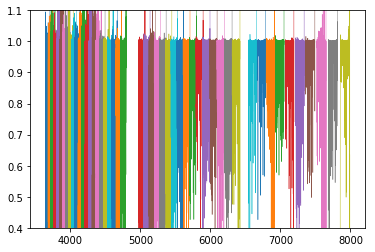

In [10]:
Sun.check_spectra()

## Check signal to noise ratio object.S_N()
- Gives estimation of S/N of input order
- Calculated by taking flux/obs_err
- observational error estimated by simply taking sqrt(flux counts)

/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_class.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return self.flux[order]/self.obs_err[order]


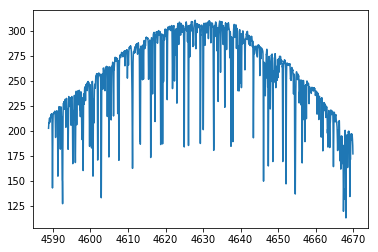

In [11]:
order = 20
plt.plot(Sun.wavelength[order],Sun.S_N(order))
plt.show()


## Example Plot - Normalization

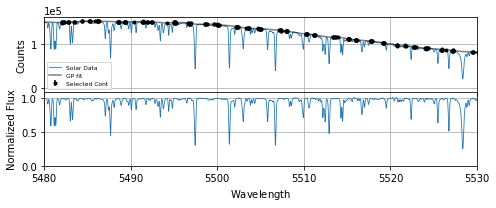

In [12]:
order = 29
xlims = [5480,5530]
ylims = [0,1.1]
fig = plt.figure(figsize=(7,3))
#fig = plt.figure(figsize=(10,5))
counts = fig.add_subplot(211)
counts.plot(Sun.wavelength[order],Sun.flux[order], lw = 0.8, label = 'Solar Data')
counts.plot(Sun.wavelength[order],Sun.pred_all[order], 'k',alpha = 0.5, label = 'GP fit')
# counts.fill_between(Sun.wavelength[order],Sun.m_all[order]+2*np.sqrt(np.diag(Sun.C_all[order])),
#                  Sun.m_all[order]-2*np.sqrt(np.diag(Sun.C_all[order])),color='k',alpha=0.2)
counts.errorbar(Sun.wavelength[order][Sun.continuum[order]],Sun.flux[order][Sun.continuum[order]],
             yerr=Sun.obs_err[order][Sun.continuum[order]],capsize=0,fmt='k.', label = 'Selected Cont')
counts.set_ylabel('Counts')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
counts.set_xlim(xlims)
counts.set_xticklabels([])
counts.legend(loc='best', prop={'size': 6})
counts.grid()

norm = fig.add_subplot(212)
#norm.errorbar(Sun.wavelength[order],Sun.normalized_flux[order],yerr=Sun.obs_err[order]/Sun.m_all[order])
norm.plot(Sun.wavelength[order],Sun.normalized_flux[order], lw = 0.8, label = 'Solar Data')
norm.set_ylabel('Normalized Flux')
norm.set_xlabel(r'$\rm Wavelength~(\AA)$')
norm.set_xlim(xlims)
norm.set_ylim(ylims)
norm.grid()

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
#plt.savefig('Cont_norm_sample.pdf')


## Load Line list
- Here we load in our list of Fe I and II lines

In [13]:
%%time
#linelist_path = '/Users/georgevejar/Documents/GitHub/Spectrum_project/Sun_ew_test1.txt'
linelist_path = Path('../Line_list_sample/Sun_fe_sample.txt')
lines = np.genfromtxt(linelist_path, skip_header = 1, usecols = 0)
elmnt = np.genfromtxt(linelist_path, skip_header = 1, usecols = 1)
EP = np.genfromtxt(linelist_path, skip_header = 1, usecols = 2)
OS = np.genfromtxt(linelist_path, skip_header = 1, usecols = 3)
ex = np.genfromtxt(linelist_path, skip_header = 1, usecols = 4)
ews = np.genfromtxt(linelist_path, skip_header = 1, usecols = 5)

#Load lines into class
Sun.load_lines(linelist_path)

CPU times: user 5.33 ms, sys: 2.04 ms, total: 7.37 ms
Wall time: 8.34 ms


## object.measure_all_ew() - measure all loaded lines
- exclude_lines: list of lines to exclude by wavelength
- plot_lines: list of lines to plot, for the first time measuring we should look at all lines so we set this equal to Sun.lines (all lines)
- ex_params: extra parameters for each line to be measured
    - this is a dictionary where each key is the wavelength of the line and the value is a list of four values: continuum adjustment, left line boundary, right line boundary, wavelength value
    - These extra parameters will be adjustments to the measurement of each line after it has been checked, below we will remeasure individual lines, make those adjustments and add them to the large list here so that measurements can be reproduced

line to measure: 5579.335


/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


line to measure: 4620.521
extra params: [0, 4620.35, 4620.65, 0]
line to measure: 4620.521


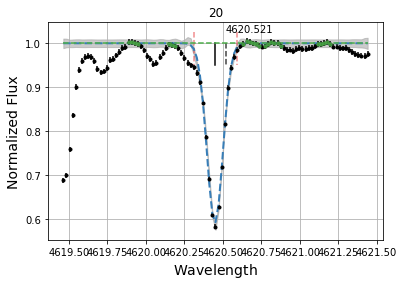

53.32 0.46 simps-int: 53.32 0.46


In [14]:
Sun.measure_line_ew(5579.335)
Sun.measure_line_ew(4620.521, ex_params=[0,4620.35,4620.65,0], window_size = 1.0)
Sun.measure_line_ew(4620.521, window_size = 2.0)

line to measure: 4620.521


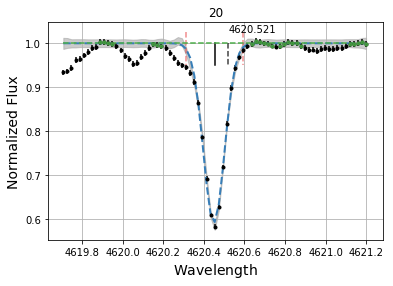

53.27 0.52 simps-int: 53.27 0.52
line to measure: 4779.439


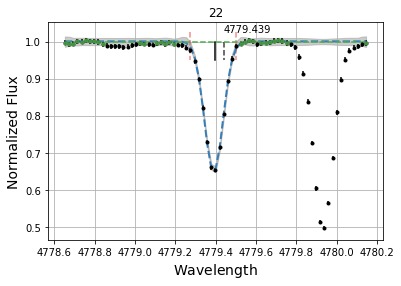

40.62 0.47 simps-int: 40.61 0.47
line to measure: 4788.757


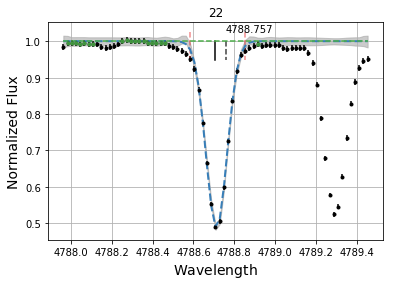

66.65 0.59 simps-int: 66.65 0.59
line to measure: 5054.643


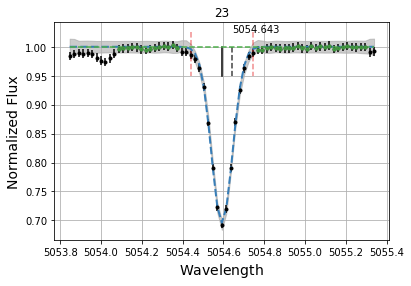

39.28 0.59 simps-int: 39.28 0.59
line to measure: 5054.643


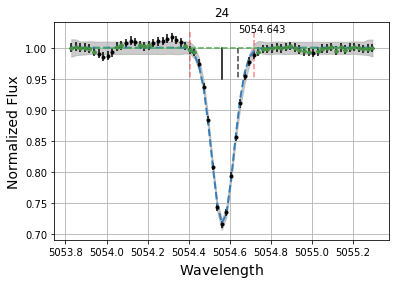

38.4 0.59 simps-int: 38.4 0.59
line to measure: 5197.577


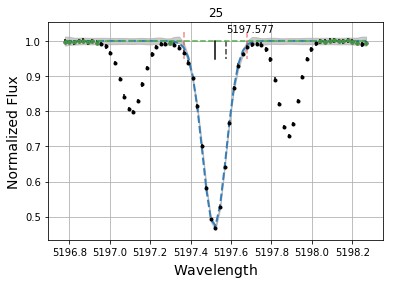

77.38 0.58 simps-int: 77.37 0.58
line to measure: 5197.577


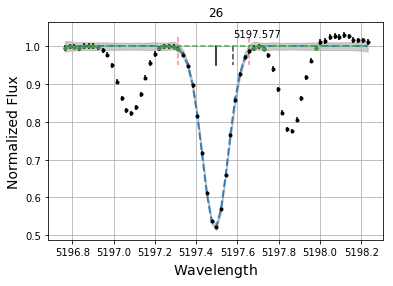

74.64 0.61 simps-int: 74.63 0.61
line to measure: 5234.625


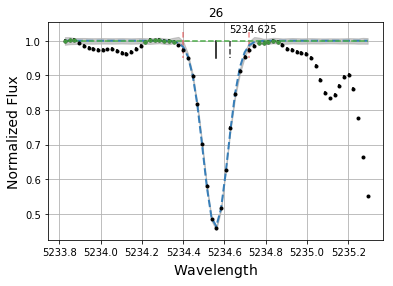

80.9 0.47 simps-int: 80.89 0.47
line to measure: 5264.812


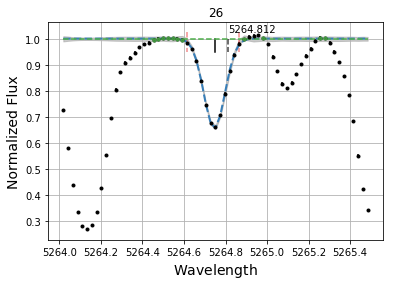

44.1 0.49 simps-int: 44.1 0.49
line to measure: 5322.041


/Users/georgevejar/Documents/GitHub/XSpect/XSpect-EW/XSpect_EW_func.py:157: RuntimeWarning: invalid value encountered in sqrt
  return bf, np.sqrt(np.diag(cov)), p0


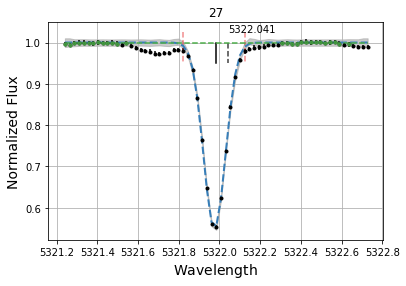

61.29 0.42 simps-int: 61.28 0.42
line to measure: 5379.574


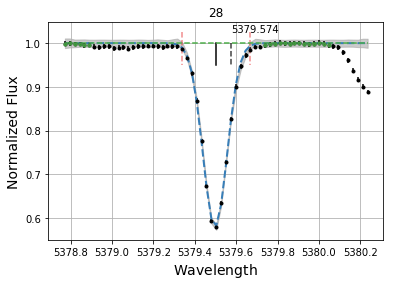

61.54 0.5 simps-int: 61.53 0.5
line to measure: 5414.073


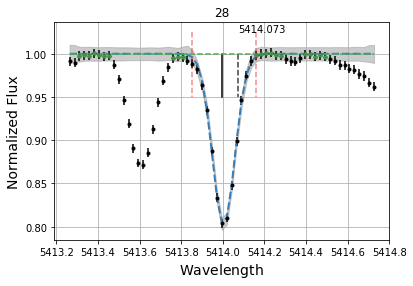

26.69 0.47 simps-int: 26.69 0.47
line to measure: 5425.257


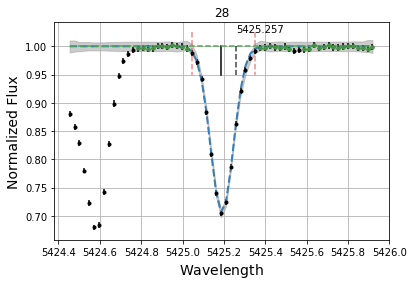

40.58 0.5 simps-int: 40.57 0.5
line to measure: 5522.447


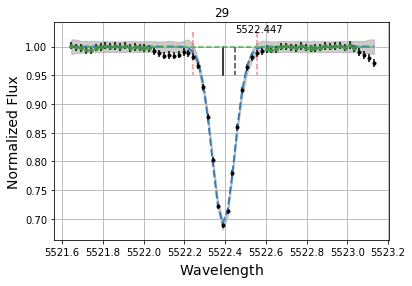

43.09 0.55 simps-int: 43.09 0.55
line to measure: 5522.447


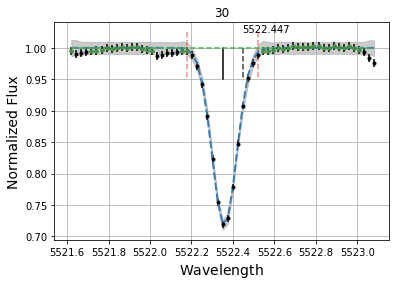

42.02 0.59 simps-int: 42.02 0.59
line to measure: 5543.936


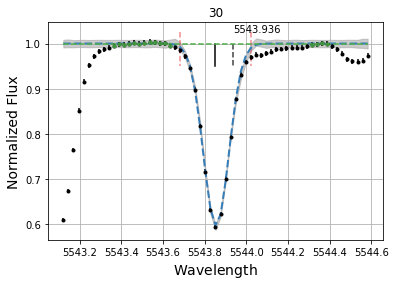

61.99 0.56 simps-int: 61.99 0.56
line to measure: 5546.5


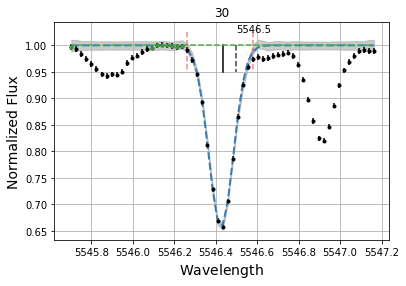

50.99 0.49 simps-int: 50.99 0.49
line to measure: 5546.991
extra params: [0.005, 0, 0, 0]
line to measure: 5560.207


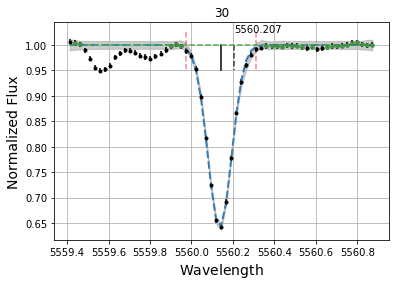

51.73 0.46 simps-int: 51.73 0.46
line to measure: 5577.03


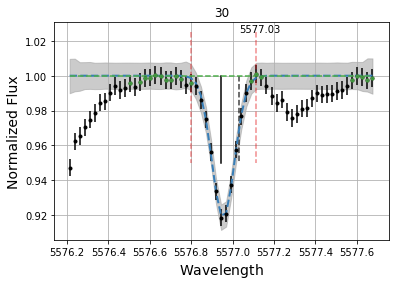

11.13 0.49 simps-int: 11.13 0.49
line to measure: 5579.335
extra params: [0.01, 5579.15, 5579.4, 0]
line to measure: 5587.574


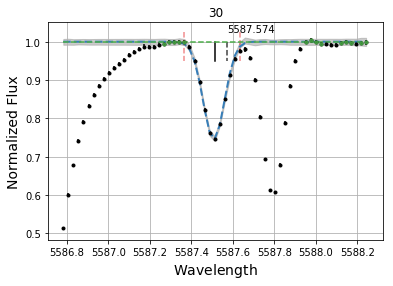

32.93 0.45 simps-int: 32.93 0.45
line to measure: 5646.684


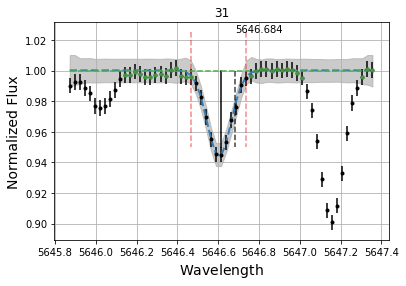

8.24 0.49 simps-int: 8.24 0.49
line to measure: 5651.469


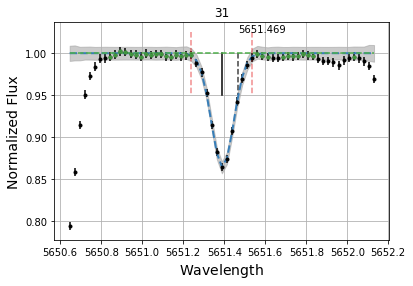

18.47 0.47 simps-int: 18.46 0.47
line to measure: 5652.318


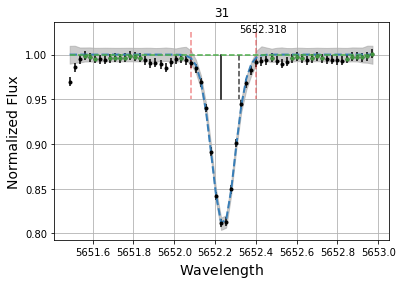

27.25 0.47 simps-int: 27.25 0.47
line to measure: 5661.346


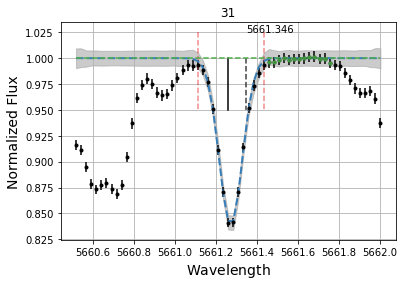

22.85 0.46 simps-int: 22.85 0.46
line to measure: 5667.518


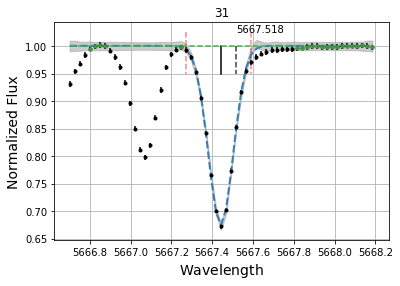

49.62 0.49 simps-int: 49.62 0.49
line to measure: 5677.684
line to measure: 5679.023


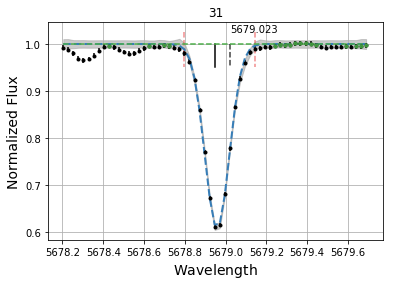

59.2 0.5 simps-int: 59.2 0.5
line to measure: 5680.24


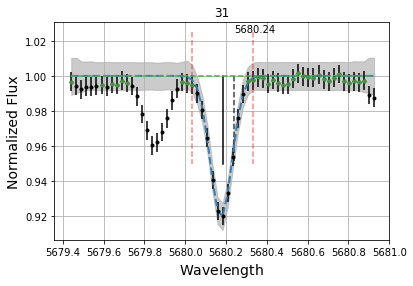

10.79 0.51 simps-int: 10.79 0.51
line to measure: 5731.762


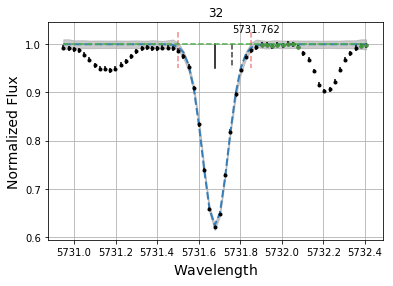

57.78 0.51 simps-int: 57.77 0.51
line to measure: 5732.275
line to measure: 5741.846


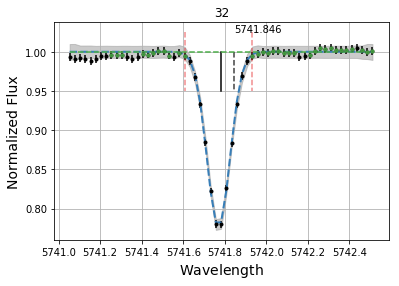

31.28 0.46 simps-int: 31.28 0.46
line to measure: 5752.032


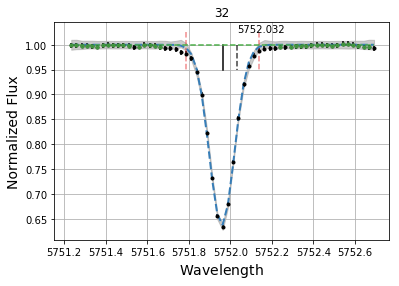

54.81 0.49 simps-int: 54.81 0.49
line to measure: 5775.081


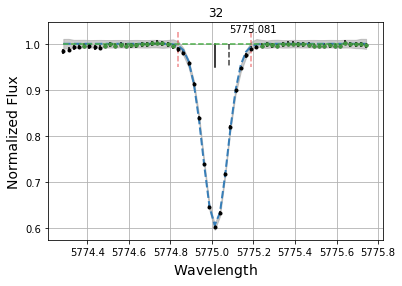

58.62 0.53 simps-int: 58.61 0.53
line to measure: 5778.45


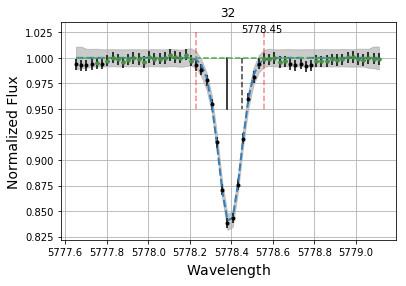

21.96 0.51 simps-int: 21.95 0.51
line to measure: 5809.218


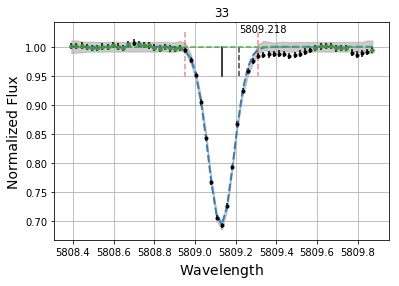

49.02 0.51 simps-int: 49.01 0.51
line to measure: 5934.655


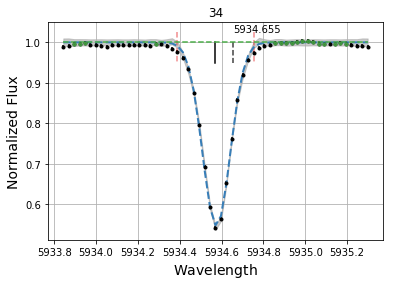

75.17 0.47 simps-int: 75.16 0.47
line to measure: 6078.999


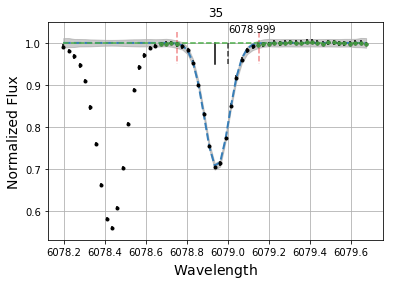

44.35 0.52 simps-int: 44.34 0.52
extra params: [0, 6078.75, 6079.15, 0]
line to measure: 6085.259


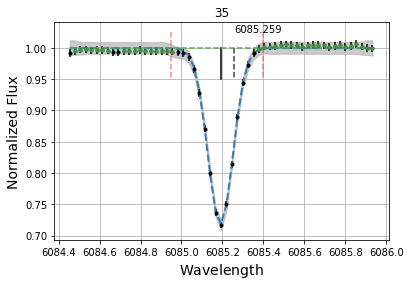

43.17 0.61 simps-int: 43.16 0.61
extra params: [-0.005, 6084.95, 6085.4, 0]
line to measure: 6084.111


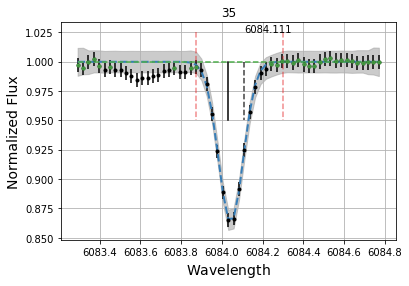

20.82 0.64 simps-int: 20.82 0.64
extra params: [0, 0, 6084.3, 0]
line to measure: 6098.245
extra params: [0, 6097.9, 6098.3, 0]
line to measure: 6151.617


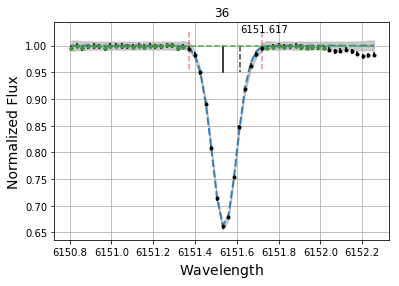

49.67 0.47 simps-int: 49.67 0.47
line to measure: 6159.368
line to measure: 6165.36


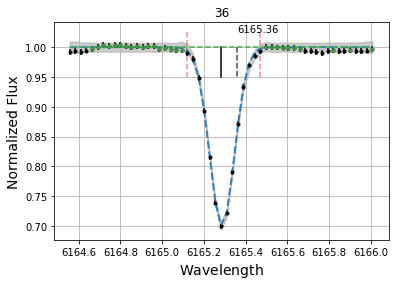

44.41 0.48 simps-int: 44.41 0.48
line to measure: 6173.336
line to measure: 6187.987
line to measure: 6113.322


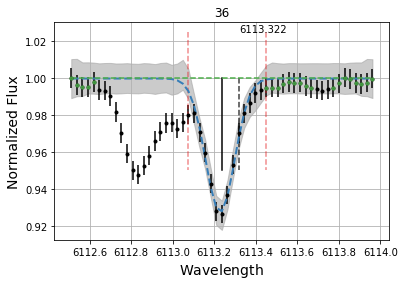

12.76 0.61 simps-int: 12.76 0.61
extra params: [0, 0, 6113.45, 0]
line to measure: 6149.258
line to measure: 6220.776
line to measure: 6226.73


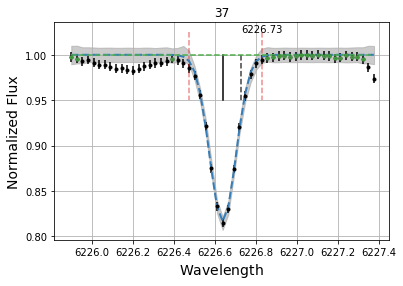

29.49 0.52 simps-int: 29.49 0.52
line to measure: 6229.228


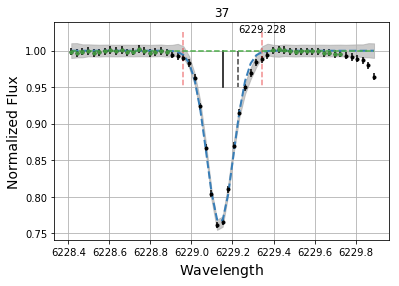

38.81 0.56 simps-int: 38.81 0.56
line to measure: 6240.645


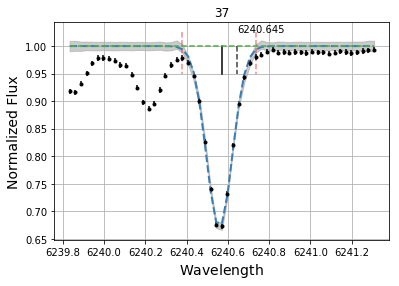

51.95 0.49 simps-int: 51.95 0.49
line to measure: 6293.924


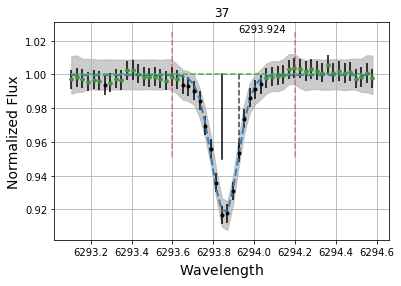

13.46 0.64 simps-int: 13.46 0.64
extra params: [0, 6293.6, 6294.2, 0]
line to measure: 6297.793


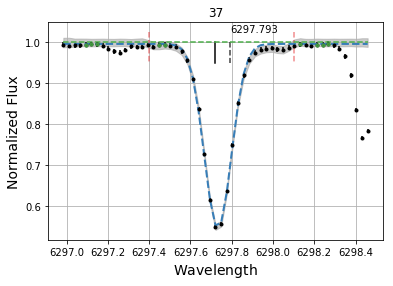

74.16 0.64 simps-int: 74.15 0.64
extra params: [-0.005, 6297.4, 6298.1, 0]
line to measure: 6247.557


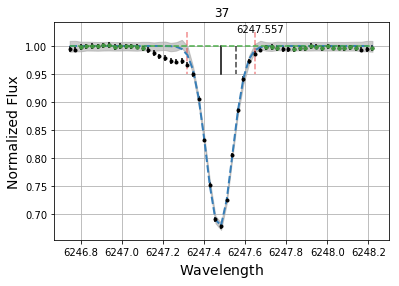

51.39 0.49 simps-int: 51.39 0.49
line to measure: 6322.685
line to measure: 6380.743
line to measure: 6392.538
line to measure: 6597.557


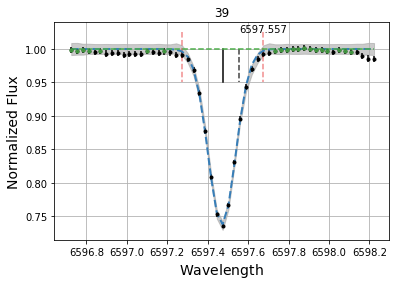

44.47 0.52 simps-int: 44.46 0.52
line to measure: 6608.024


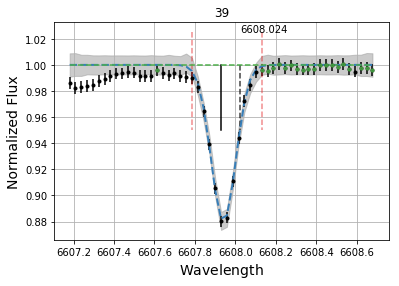

18.41 0.48 simps-int: 18.4 0.48
line to measure: 6609.11


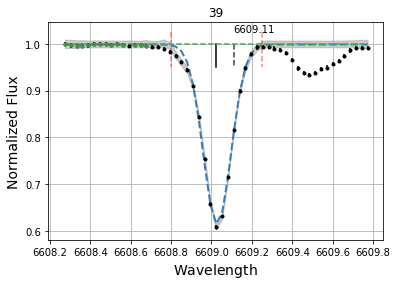

66.35 0.49 simps-int: 66.34 0.49
extra params: [0, 6608.8, 6609.25, 0]
line to measure: 6627.54


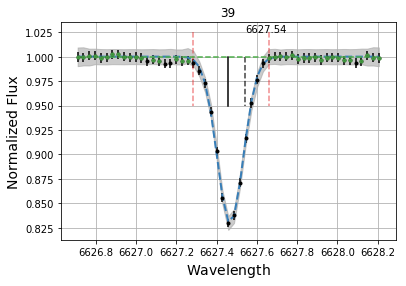

27.8 0.54 simps-int: 27.8 0.54
line to measure: 6653.85


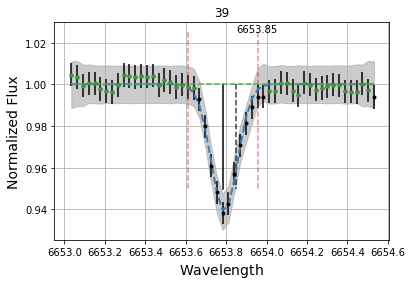

9.98 0.64 simps-int: 9.98 0.64
line to measure: 6703.567
line to measure: 6710.316


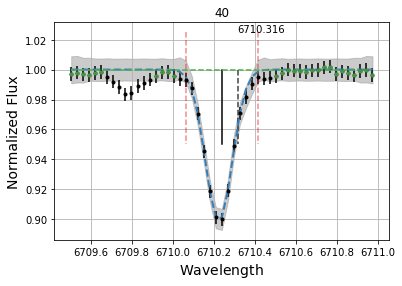

16.62 0.5 simps-int: 16.62 0.5
line to measure: 6713.745
line to measure: 6716.222


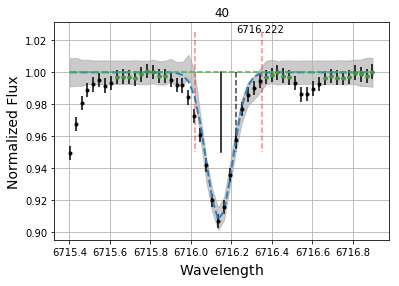

14.96 0.51 simps-int: 14.96 0.51
extra params: [0, 6716.02, 6716.35, 6716.15]
line to measure: 6725.353


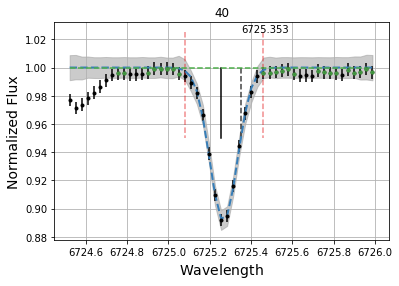

18.28 0.52 simps-int: 18.28 0.52
line to measure: 6726.666
line to measure: 6733.151
line to measure: 6739.52


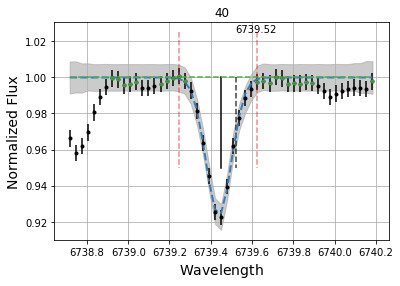

11.91 0.52 simps-int: 11.91 0.52
line to measure: 6745.09
line to measure: 6745.957
line to measure: 6750.15
line to measure: 6752.716
line to measure: 7114.549
line to measure: 7284.835
line to measure: 7222.394
line to measure: 7449.335


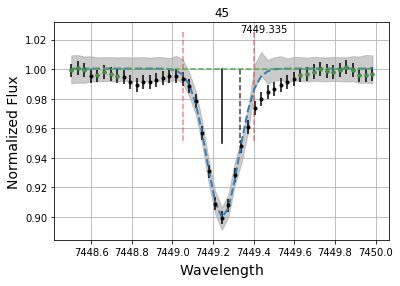

19.71 0.58 simps-int: 19.71 0.58
extra params: [0, 0, 7449.4, 0]
line to measure: 7711.723
extra params: [-0.005, 0, 0, 0]


In [15]:
plot_lines = Sun.lines
ex_params = {6098.245:[0,6097.9,6098.3,0],
             6113.322:[0,0,6113.45,0],
             6293.924:[0,6293.6,6294.2,0],
             6716.222:[0,6716.02,6716.35,6716.15],
             7449.335:[0,0,7449.4,0],
             5546.991:[0.005,0,0,0],
             5579.335:[0.01,5579.15,5579.4,0],
             6078.999:[0,6078.75,6079.15,0],
             6085.259:[-0.005,6084.95,6085.4,0],
             6297.793:[-0.005,6297.4,6298.1,0],
             6609.11:[0,6608.8,6609.25,0],
             6084.111:[0,0,6084.3,0],
             7711.723:[-0.005,0,0,0]}

#ex_params = {}

exclude_lines = np.array([])
Sun.measure_all_ew(exclude_lines = exclude_lines, plot_lines = plot_lines, ex_params = ex_params)

## Line Checking
- All lines can be checked above as they are plotted
- make note of fits that look off in any way and remeasure those lines individually
## object.measure_line_ew() 
- will remeasure a since line by wavelength, the line must already be loaded
- window_size: changes the window size for the fit for a closer or wider look at the fit. Data within the window is used for the fit, so if this is too small the fit will have problems
- ex_params: can also be set here
- save_line: False/True used to save the shifted wavelength and normalized flux values in the window
- save_plot: False/True used to save the output plot

line to measure: 4620.521


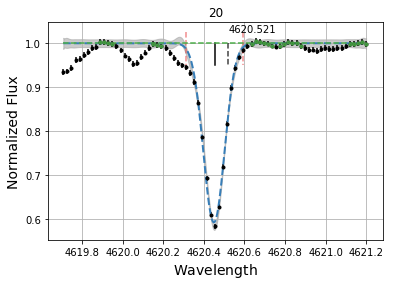

53.33 0.51 simps-int: 53.43 1.17
line to measure: 4620.521


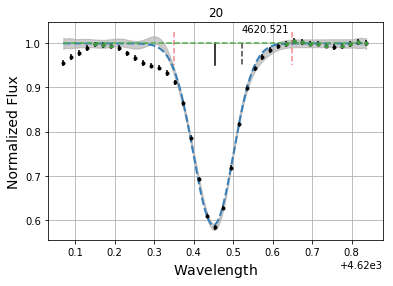

52.43 0.56 simps-int: 5.16 15.66
extra params: [0, 4620.35, 4620.65, 0]
line to measure: 4620.521


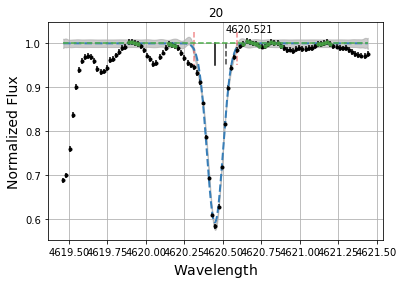

53.3 0.49 simps-int: 53.64 1.33


In [15]:
Sun.measure_line_ew(4620.521)
Sun.measure_line_ew(4620.521, ex_params=[0,4620.35,4620.65,0], window_size = .8)
Sun.measure_line_ew(4620.521, window_size = 2.0)

## Flag problematic lines automatically

In [ ]:
Sun.check_for_flags()

## View lines 
- print lines and their measured values
- plot all lines with flags
- plot comparison/residuals of a star and other measured ews (like ones done by hand)

In [16]:
for i in range(len(Sun.lines)):
    print("{0:10} {1:6} {2:5}".format(Sun.lines[i], np.round(Sun.lines_ew[i],2), np.round(Sun.lines_ew_err[i],2)))

  4779.439  40.66   0.5
  4788.757  66.72  0.64
  5054.643  38.38  0.59
  5322.041  61.28  0.43
  5379.574  61.53   0.5
  5522.447  41.98  0.61
  5543.936  62.01  0.52
    5546.5  50.98  0.47
  5546.991   26.0  0.48
  5560.207  51.71  0.47
   5577.03  11.14  0.62
  5579.335  10.63  0.49
  5587.574  32.96  0.44
  5646.684   8.22  0.46
  5651.469  18.52  0.45
  5652.318  27.21  0.48
  5661.346  22.87  0.47
  5667.518  49.64  0.47
  5677.684   6.54   0.5
  5679.023  59.21  0.51
   5680.24  10.82   0.5
  5731.762  57.74  0.52
  5732.275  13.71  0.45
  5741.846  31.33  0.49
  5752.032  54.76  1.13
  5775.081  58.64  0.52
   5778.45   22.0  0.52
  5809.218  49.04  0.55
  5934.655  75.19  0.49
  6078.999  44.37  0.58
  6085.259  43.19  0.64
  6098.245  17.13  0.71
  6151.617  49.64  1.06
  6159.368  13.12  0.69
   6165.36   44.4  0.47
  6173.336  67.81  4.11
  6187.987  46.94  1.15
  6220.776  19.23  0.64
   6226.73  29.48  0.53
  6229.228  38.85  0.94
  6240.645  51.95  0.48
  6293.924  13.4

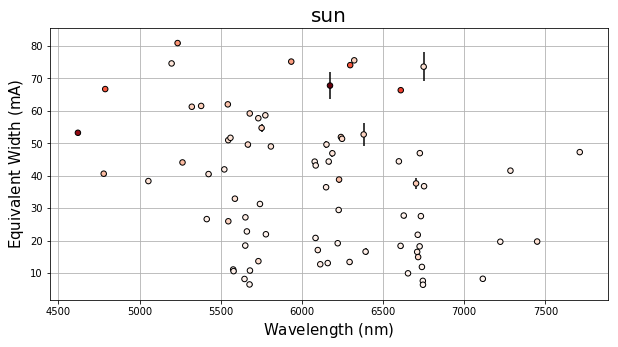

In [17]:
plot_line_info(Sun, "sun")

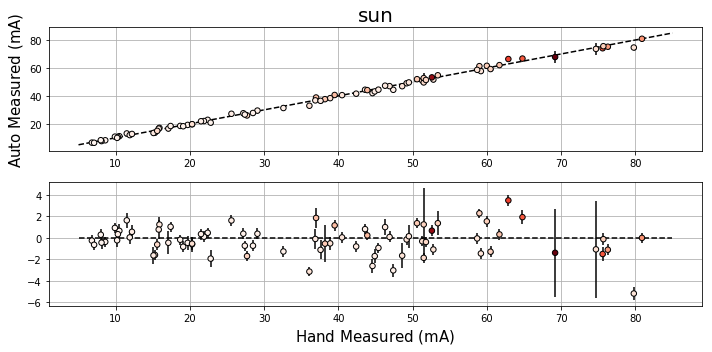

In [18]:
plot_comparison_res(Sun, ews, 'sun', xy = [5,85])

In [19]:
#linelist_path = '/Users/georgevejar/Documents/Github/Spectrum_project/abunds_tests/Pr0201/re_sorted_linelist_mod_sun.txt'
#linelist_path = '/Users/georgevejar/Documents/abs_spect/praesepe_cluster/sun/re_sorted_linlist_mod.txt'
linelist_path = Path('../Line_list_sample/Sun_ele_sample.txt')
lines = np.genfromtxt(linelist_path, skip_header = 1, usecols = 0)
elmnt = np.genfromtxt(linelist_path, skip_header = 1, usecols = 1)
EP = np.genfromtxt(linelist_path, skip_header = 1, usecols = 2)
OS = np.genfromtxt(linelist_path, skip_header = 1, usecols = 3)
ex = np.genfromtxt(linelist_path, skip_header = 1, usecols = 4)
ews = np.genfromtxt(linelist_path, skip_header = 1, usecols = 5)

#Load lines into class
Sun.load_lines(linelist_path)

line to measure: 4730.029


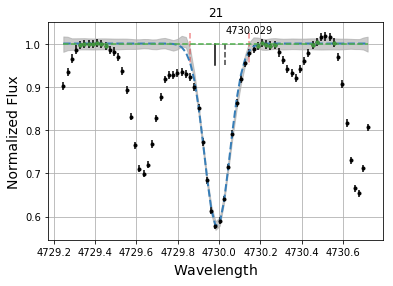

65.33 0.74 simps-int: 65.2 3.01
line to measure: 4694.113


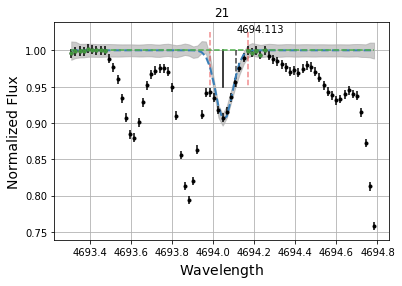

9.75 0.43 simps-int: 9.73 0.61
line to measure: 4695.443


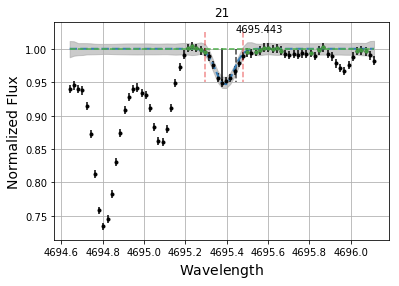

5.88 0.42 simps-int: 5.86 0.56
line to measure: 4722.153


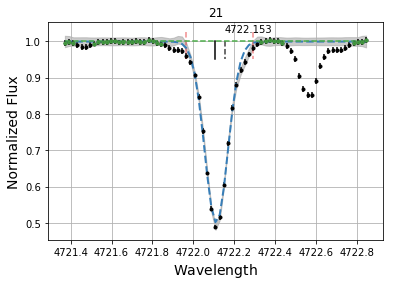

70.89 0.65 simps-int: 70.89 0.65
line to measure: 4730.029


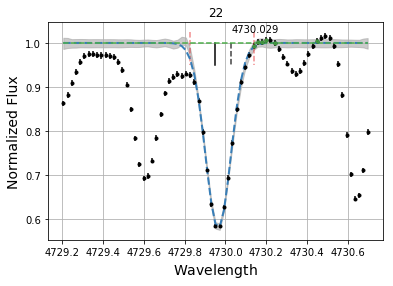

65.91 0.57 simps-int: 65.91 0.57
line to measure: 4779.985


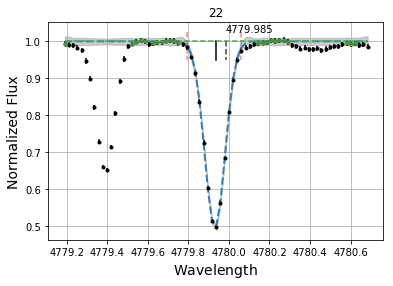

63.66 0.51 simps-int: 63.65 0.51
line to measure: 4722.153


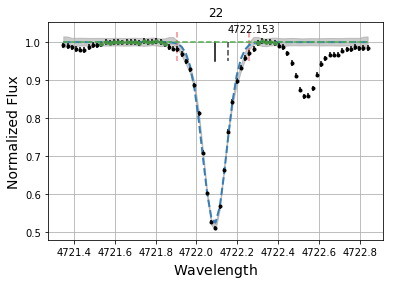

70.88 0.64 simps-int: 70.87 0.64
line to measure: 5052.167


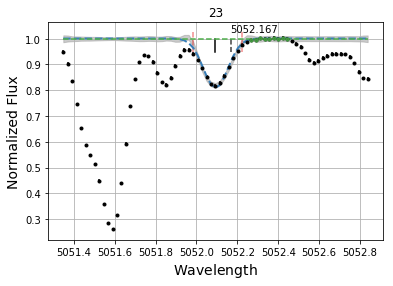

28.92 0.57 simps-int: 28.92 0.57
line to measure: 5039.957


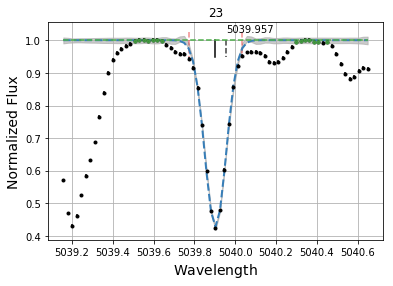

75.34 0.45 simps-int: 75.34 0.45
line to measure: 5024.844


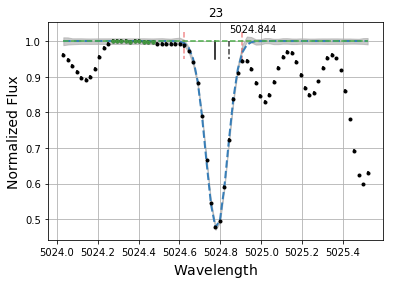

70.1 0.45 simps-int: 69.96 3.16
line to measure: 5022.868


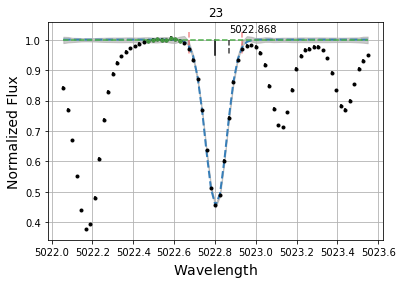

71.0 0.42 simps-int: 70.99 0.42
line to measure: 5052.167


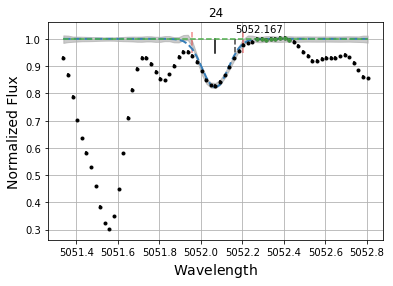

27.95 1.11 simps-int: 27.64 3.86
line to measure: 5210.385


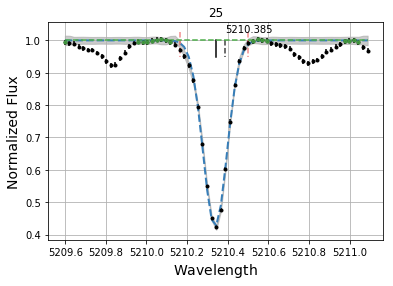

84.45 0.68 simps-int: 84.44 0.68
line to measure: 5154.068


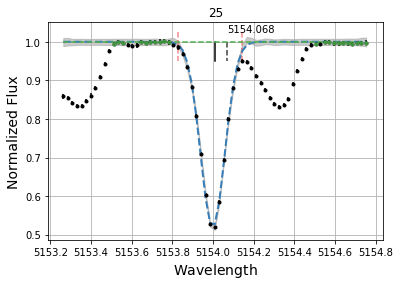

71.72 0.49 simps-int: 71.71 0.49
line to measure: 5210.385


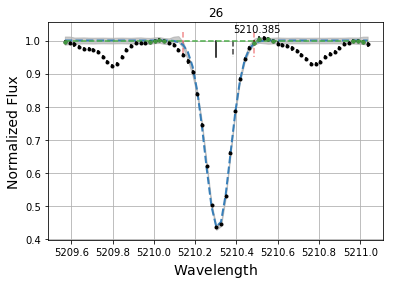

87.06 0.55 simps-int: 87.05 0.55
line to measure: 5336.786


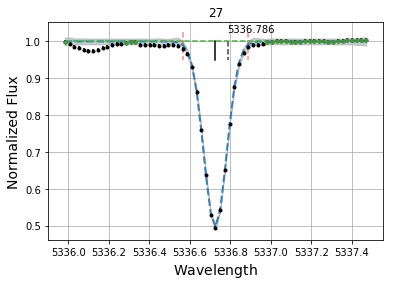

71.27 0.45 simps-int: 70.12 8.95
line to measure: 5301.039


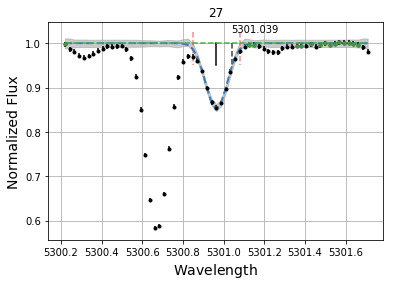

19.63 0.44 simps-int: 19.59 0.98
line to measure: 5380.337


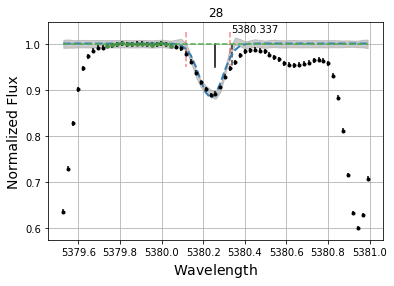

16.6 0.48 simps-int: 16.53 1.15
line to measure: 5381.021


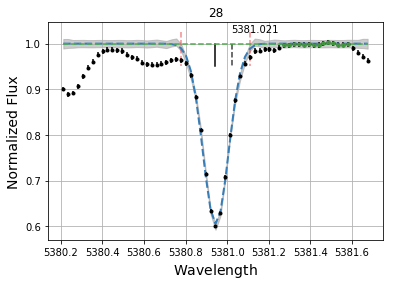

60.83 0.53 simps-int: 60.82 0.53
line to measure: 5432.546


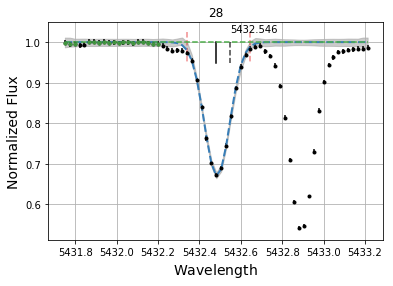

50.87 0.52 simps-int: 50.76 2.33
line to measure: 5399.499


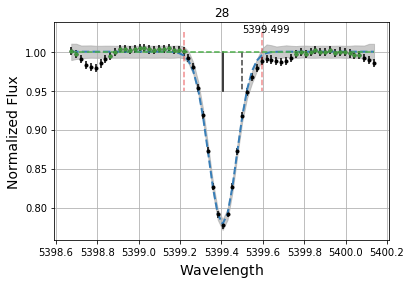

37.6 0.89 simps-int: 37.43 3.18
line to measure: 5682.633


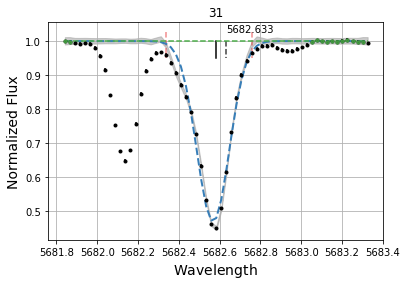

105.59 0.65 simps-int: 105.58 0.65
line to measure: 5701.104


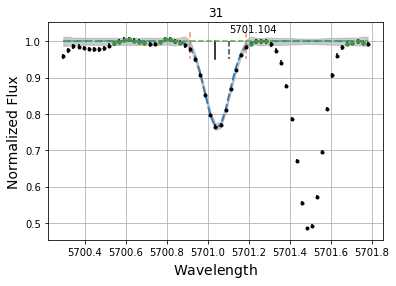

35.32 0.61 simps-int: 35.32 0.61
line to measure: 5690.425


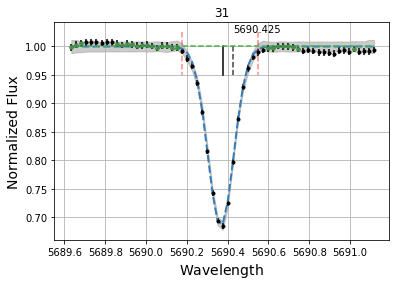

50.02 0.62 simps-int: 50.02 0.62
line to measure: 5702.306


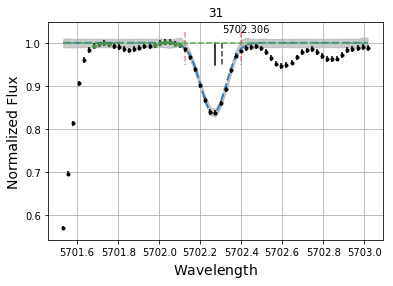

25.14 0.61 simps-int: 25.09 1.28
line to measure: 5647.234


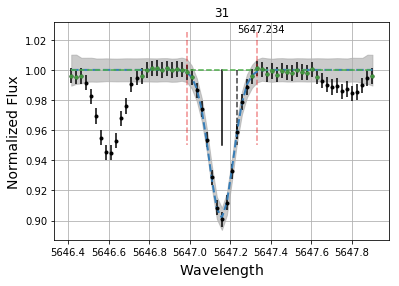

14.55 0.56 simps-int: 14.36 1.87
line to measure: 5711.088


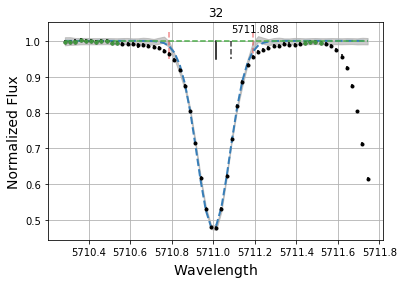

104.69 0.64 simps-int: 104.68 0.64
line to measure: 5701.104


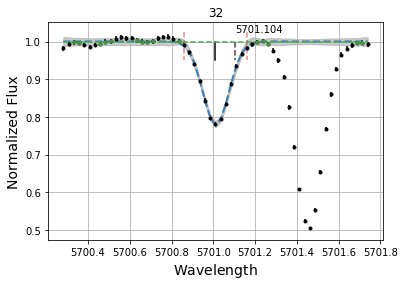

34.76 0.61 simps-int: 34.69 1.67
line to measure: 5708.4


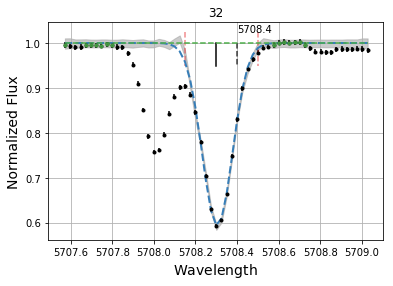

74.49 0.61 simps-int: 73.14 9.92
line to measure: 5772.149


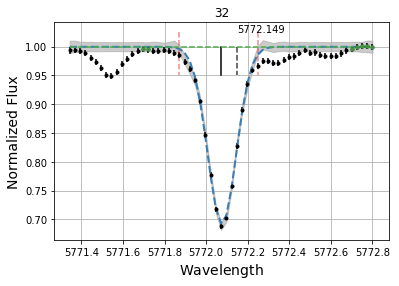

52.97 1.2 simps-int: 52.85 3.7
line to measure: 5739.469


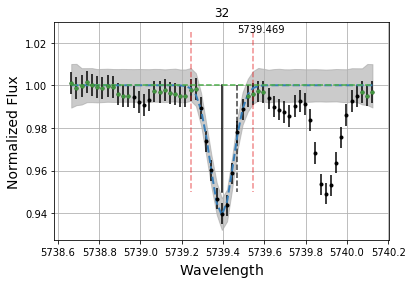

8.36 0.47 simps-int: 8.25 1.15
line to measure: 5737.059


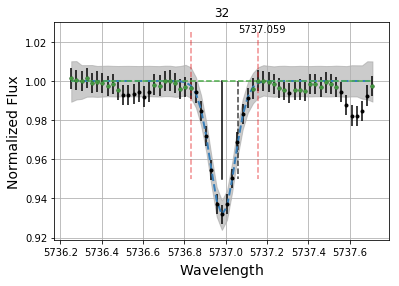

10.13 0.52 simps-int: 10.06 1.08
line to measure: 5727.048


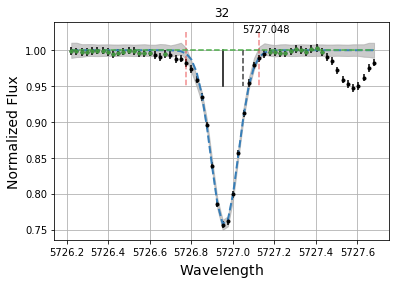

40.18 0.94 simps-int: 39.6 5.23
line to measure: 5787.918


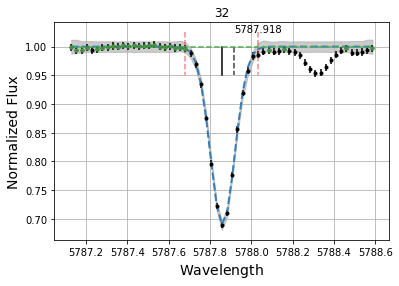

45.76 0.54 simps-int: 45.67 2.11
line to measure: 5783.85


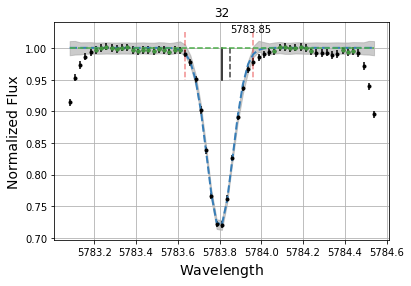

44.25 0.59 simps-int: 44.25 0.59
line to measure: 5783.063


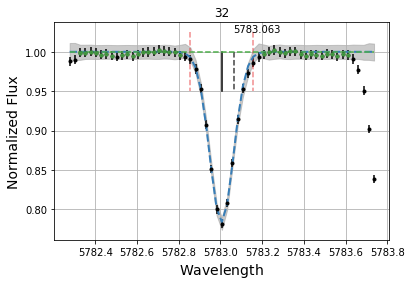

30.95 0.54 simps-int: 30.94 0.54
line to measure: 5702.306


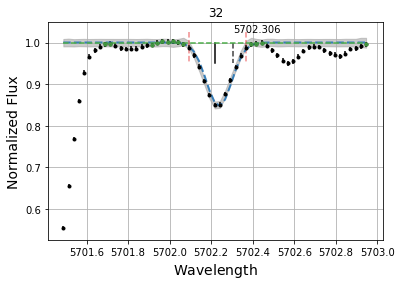

23.53 1.01 simps-int: 23.18 3.4
line to measure: 5748.346


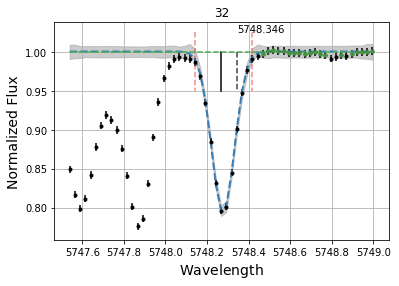

28.45 0.43 simps-int: 28.39 1.34
line to measure: 5754.655


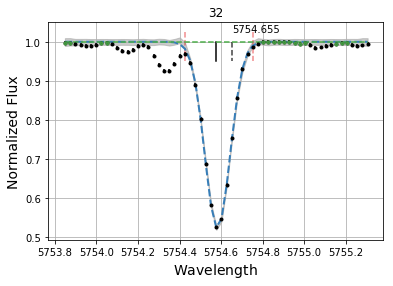

73.35 0.42 simps-int: 73.05 4.65
line to measure: 5760.828


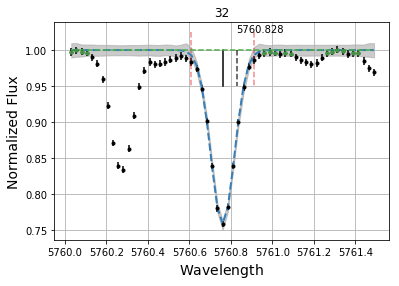

34.4 0.46 simps-int: 34.39 0.46
line to measure: 5782.127


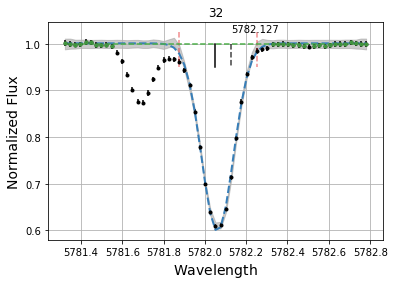

77.65 0.62 simps-int: 77.64 0.62
line to measure: 5867.562


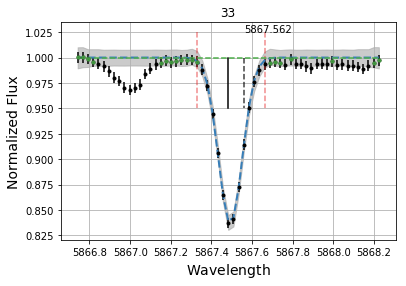

24.16 0.53 simps-int: 24.16 0.53
line to measure: 5866.451


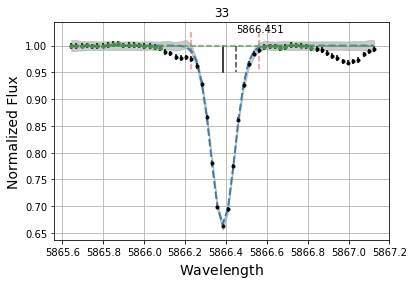

48.43 0.49 simps-int: 48.42 0.49
line to measure: 5846.986


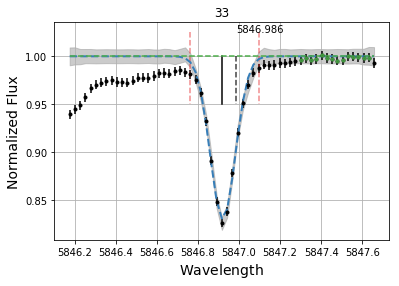

26.02 0.5 simps-int: 25.97 1.27
line to measure: 5805.213


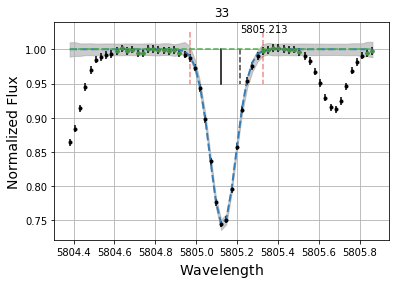

40.9 0.54 simps-int: 40.81 1.9
line to measure: 6091.171


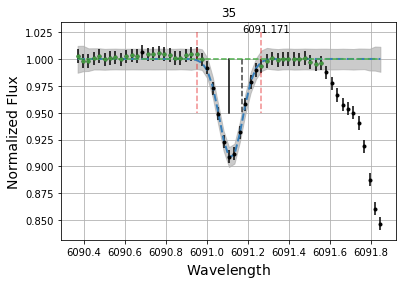

12.99 0.62 simps-int: 12.87 1.55
line to measure: 6081.441


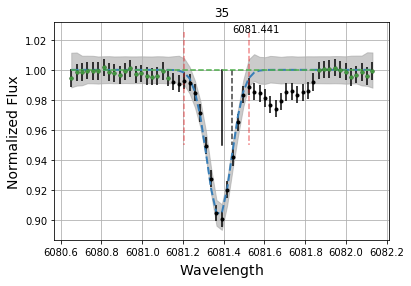

14.86 0.9 simps-int: 14.71 1.98
line to measure: 6090.214


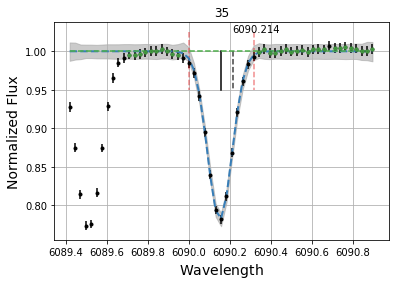

32.92 0.63 simps-int: 32.79 2.17
line to measure: 6093.143


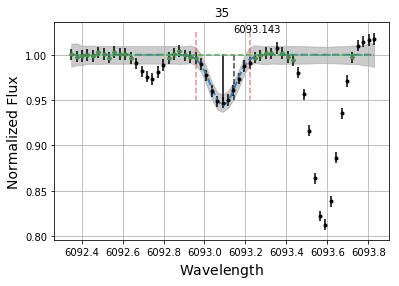

8.37 0.6 simps-int: 8.31 1.0
line to measure: 6154.226


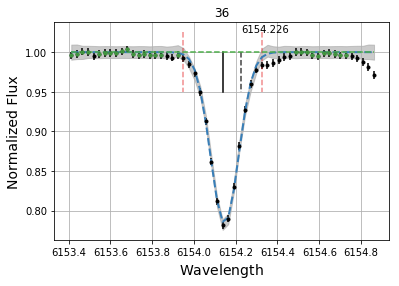

36.38 0.85 simps-int: 36.3 2.62
line to measure: 6160.747


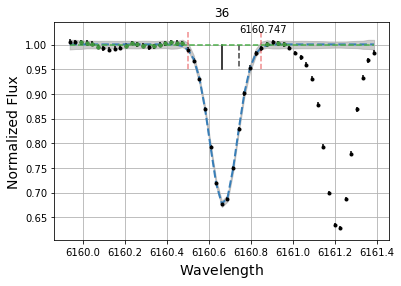

52.76 0.5 simps-int: 52.44 4.1
line to measure: 6125.021


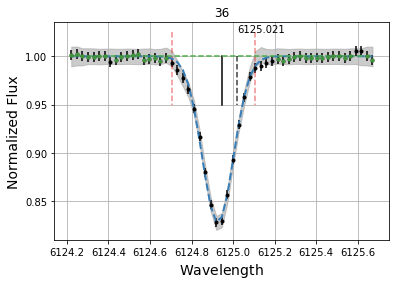

32.55 0.6 simps-int: 32.42 2.14
line to measure: 6145.016


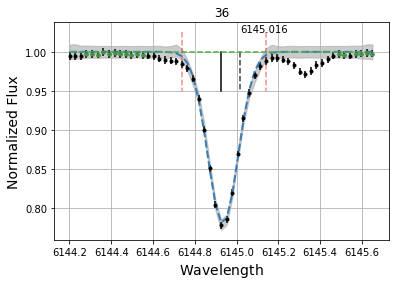

40.03 0.55 simps-int: 39.87 2.59
line to measure: 6142.483


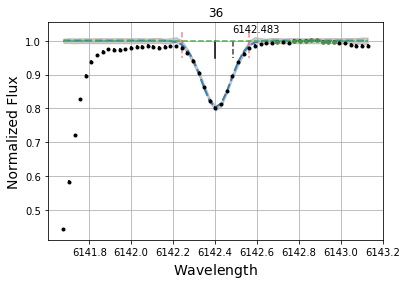

34.1 1.06 simps-int: 33.87 3.74
line to measure: 6166.439


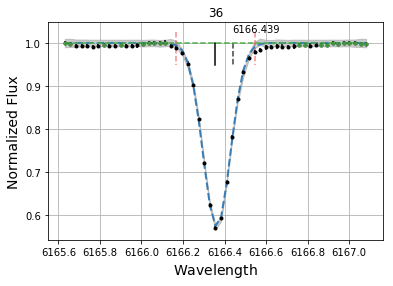

70.32 0.49 simps-int: 70.31 0.49
line to measure: 6169.042


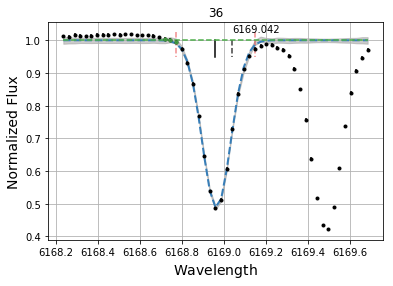

87.56 0.52 simps-int: 87.21 5.55
line to measure: 6161.297


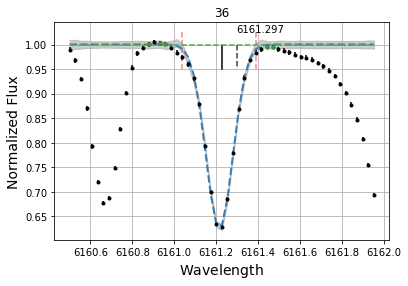

60.44 0.49 simps-int: 60.07 4.69
line to measure: 6169.563


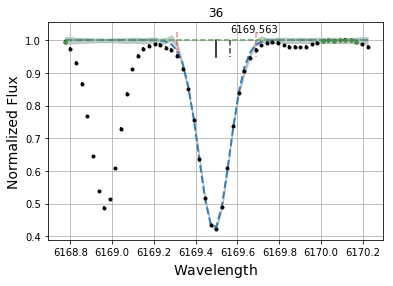

107.0 0.57 simps-int: 106.99 0.57
line to measure: 6098.658


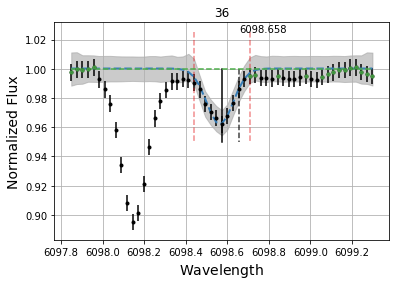

6.08 0.59 simps-int: 5.99 1.0
line to measure: 6111.645


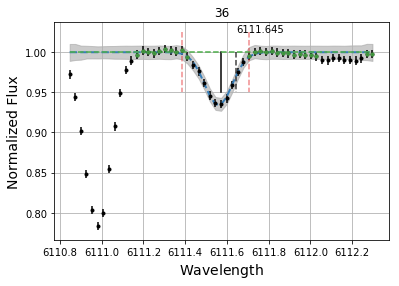

10.95 0.69 simps-int: 10.79 1.54
line to measure: 6093.143


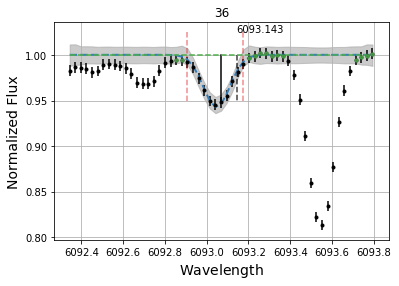

9.16 0.65 simps-int: 9.13 0.91
line to measure: 6108.107


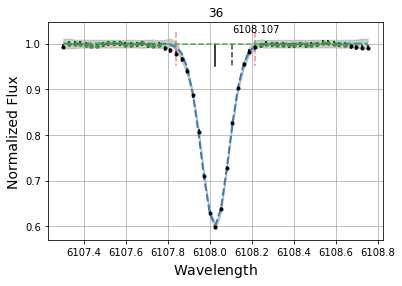

65.36 0.52 simps-int: 65.23 2.97
line to measure: 6128.963


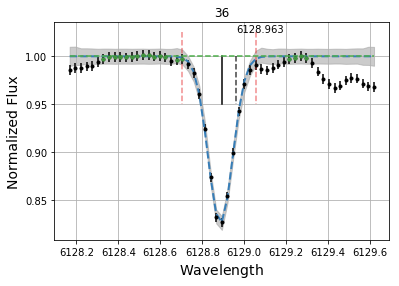

25.54 1.16 simps-int: 25.48 1.63
line to measure: 6177.236


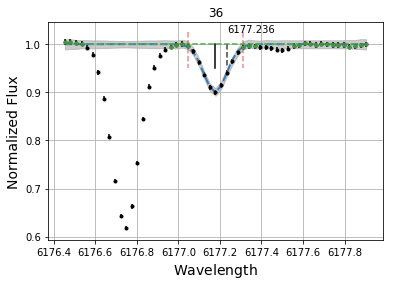

13.8 0.5 simps-int: 13.75 1.0
line to measure: 6176.807


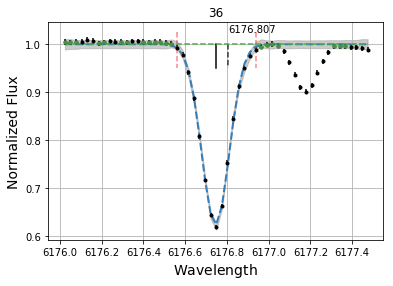

62.04 1.36 simps-int: 61.77 5.16
line to measure: 6111.066


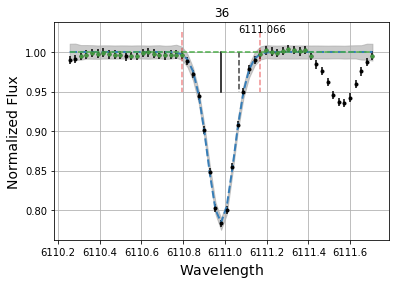

34.43 0.54 simps-int: 34.29 2.24
line to measure: 6133.963


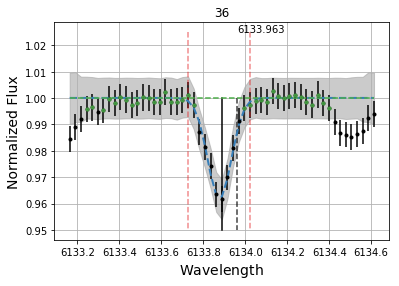

5.4 0.53 simps-int: 5.39 0.62
line to measure: 6175.36


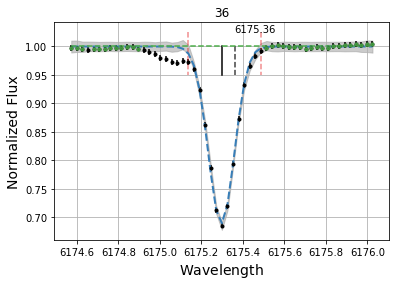

48.51 1.07 simps-int: 48.11 5.09
line to measure: 6186.709


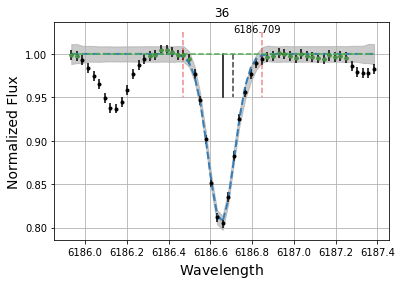

30.79 0.62 simps-int: 30.48 3.13
line to measure: 6130.13


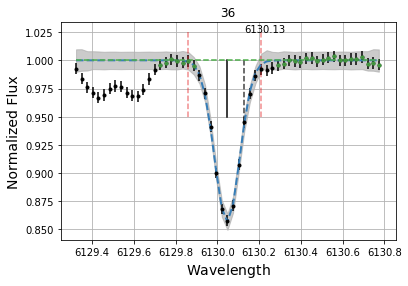

21.59 0.47 simps-int: 21.5 1.44
line to measure: 6300.304


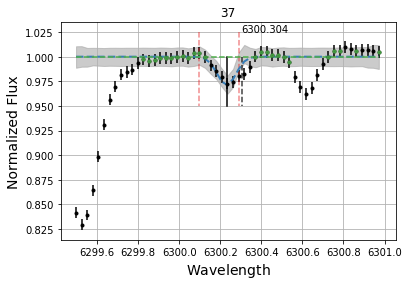

2.97 2.09 simps-int: 2.61 1.74
line to measure: 6244.466


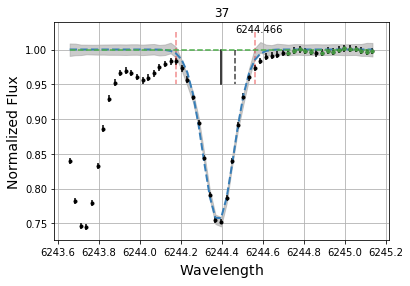

46.48 0.57 simps-int: 45.92 5.09
line to measure: 6243.815


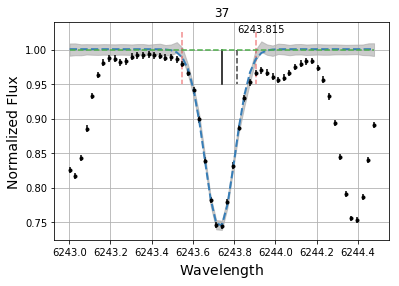

47.28 0.52 simps-int: 46.8 4.73
line to measure: 6245.637


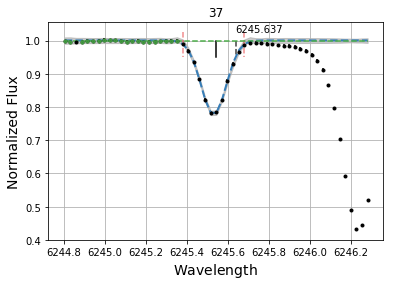

34.29 0.48 simps-int: 34.29 0.48
line to measure: 6261.098


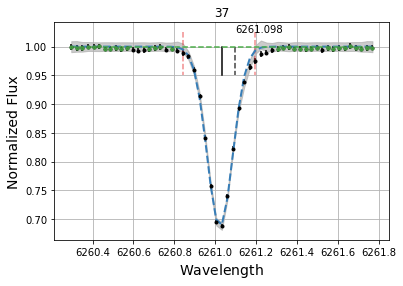

49.31 0.51 simps-int: 49.3 0.51
line to measure: 6258.102


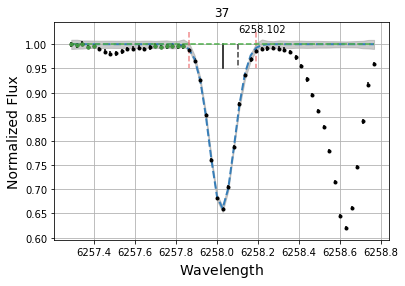

51.66 0.47 simps-int: 51.34 4.02
line to measure: 6285.15


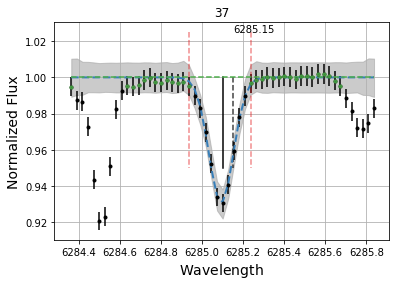

10.36 1.12 simps-int: 10.27 1.72
line to measure: 6251.827


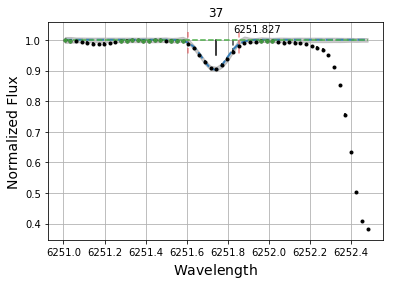

14.75 0.47 simps-int: 14.66 1.23
line to measure: 6224.529


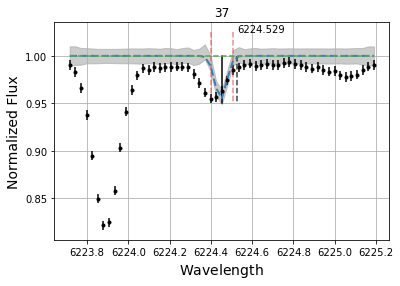

3.08 0.49 simps-int: 3.0 0.74
line to measure: 6243.105


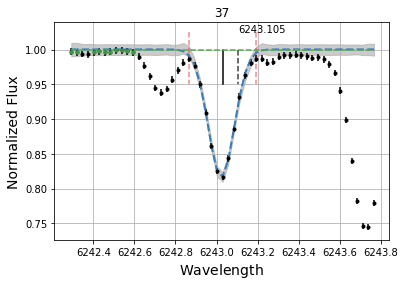

29.25 0.48 simps-int: 29.24 0.48
line to measure: 6204.6


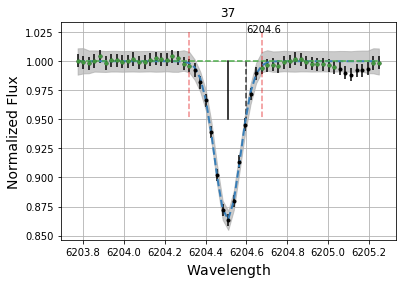

21.47 0.59 simps-int: 21.3 2.0
line to measure: 6223.981


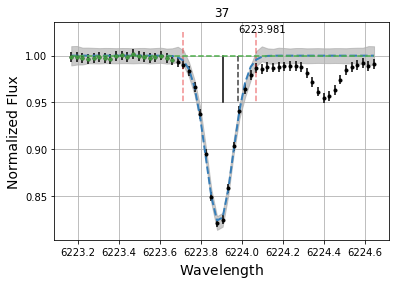

29.44 0.83 simps-int: 29.26 2.82
line to measure: 6230.09


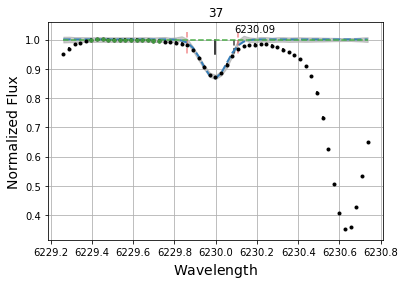

19.9 0.48 simps-int: 19.78 1.61
line to measure: 6414.98


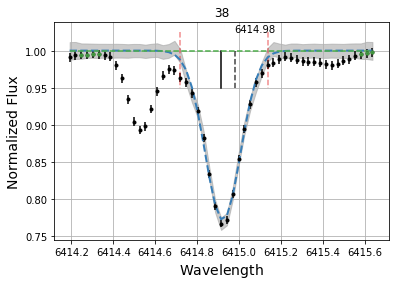

48.32 0.8 simps-int: 48.32 0.8
line to measure: 6320.851


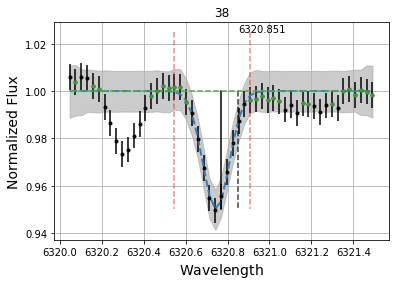

7.92 0.66 simps-int: 7.85 1.1
line to measure: 6330.091


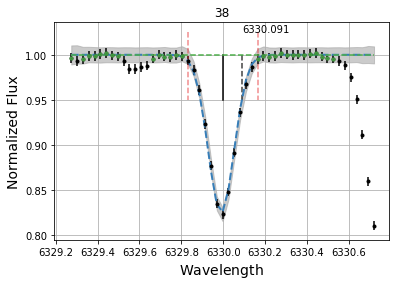

27.03 1.09 simps-int: 26.63 4.09
line to measure: 6327.593


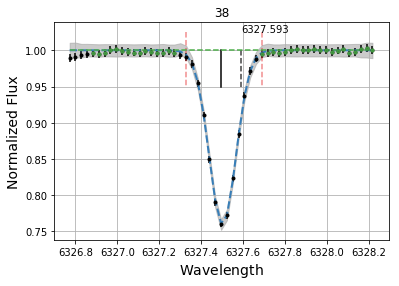

38.56 0.92 simps-int: 38.31 3.68
line to measure: 6370.341


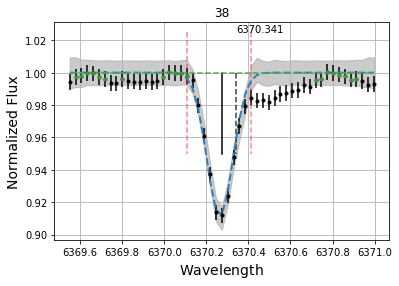

13.65 0.67 simps-int: 13.52 1.89
line to measure: 6378.247


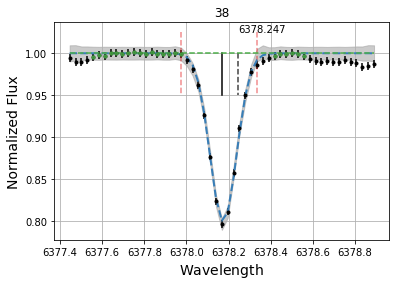

31.63 0.98 simps-int: 31.36 3.78
line to measure: 6587.61


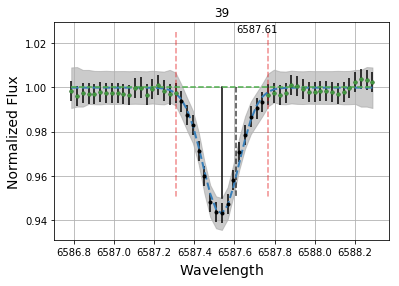

12.81 0.89 simps-int: 12.59 2.3
line to measure: 6572.779


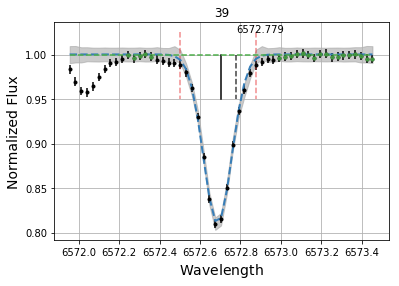

33.44 0.56 simps-int: 33.44 0.56
line to measure: 6604.601


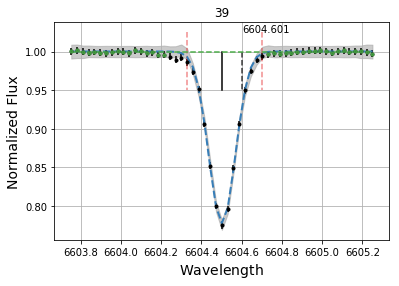

36.83 0.48 simps-int: 36.83 0.48
line to measure: 6632.433


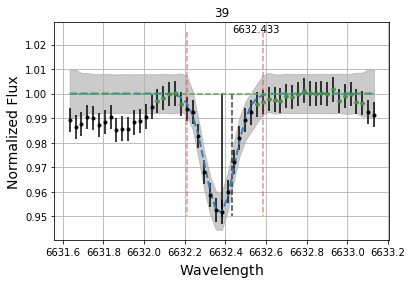

8.77 0.69 simps-int: 8.64 1.46
line to measure: 6595.864


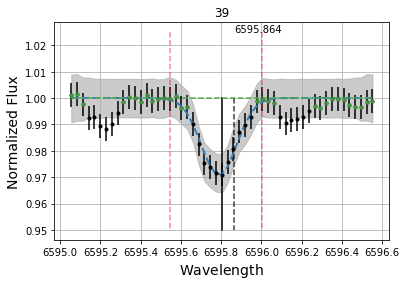

6.43 0.77 simps-int: 6.26 1.54
line to measure: 6643.629


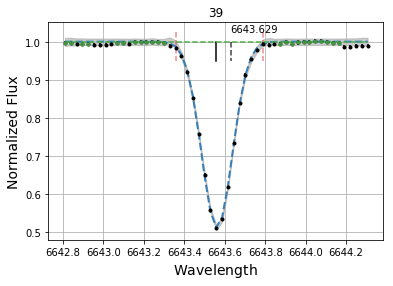

92.95 0.6 simps-int: 92.94 0.6
line to measure: 6598.593


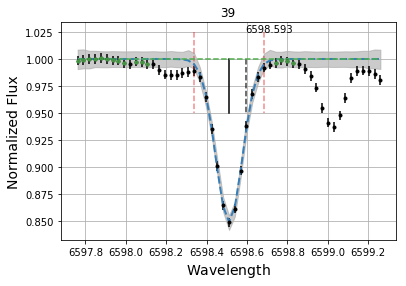

24.89 0.53 simps-int: 24.89 0.53
line to measure: 6635.118


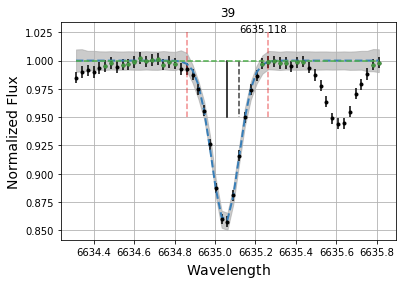

24.3 0.58 simps-int: 24.25 1.23
line to measure: 6696.023


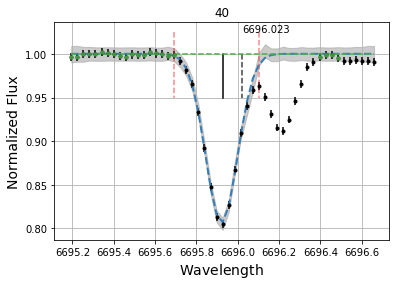

37.52 0.57 simps-int: 37.29 2.95
line to measure: 6698.673


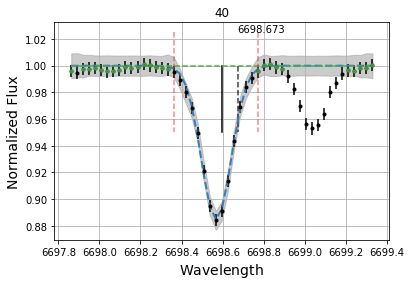

21.08 0.58 simps-int: 20.78 2.54
line to measure: 6741.628


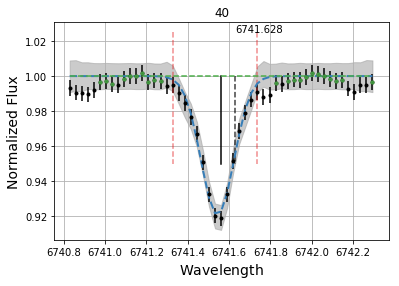

15.81 0.74 simps-int: 15.74 1.42
line to measure: 6757.171


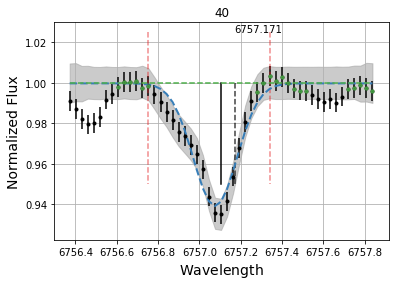

16.1 0.97 simps-int: 16.03 1.62
line to measure: 6767.768


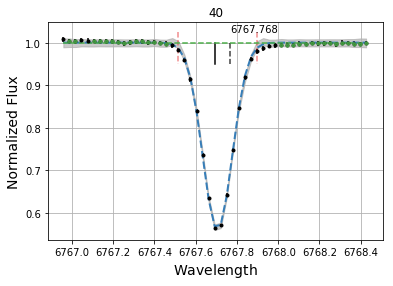

78.96 0.57 simps-int: 78.01 8.62
line to measure: 6841.19


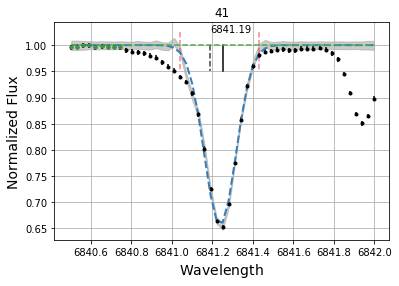

67.4 2.97 simps-int: 67.39 2.97
line to measure: 6848.58


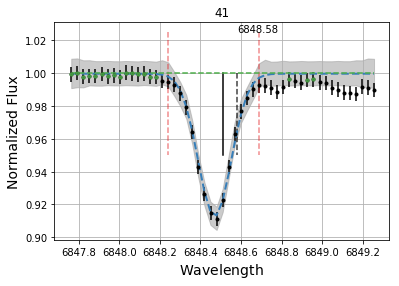

17.8 0.81 simps-int: 17.6 2.51
line to measure: 6814.942


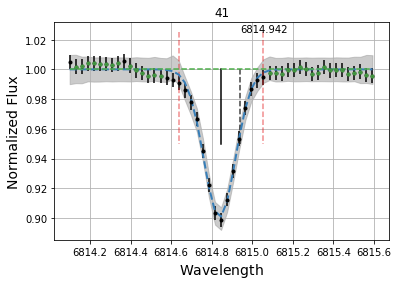

19.44 0.58 simps-int: 19.36 1.36
line to measure: 6842.035


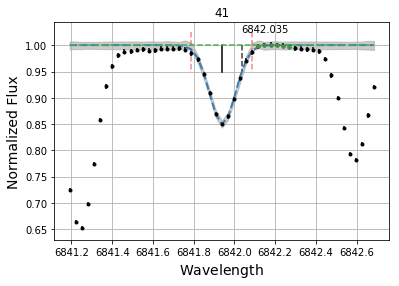

24.05 0.48 simps-int: 24.0 1.18
line to measure: 7003.569


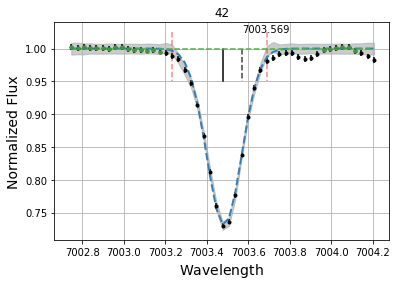

56.86 0.59 simps-int: 56.85 0.59
line to measure: 6978.397


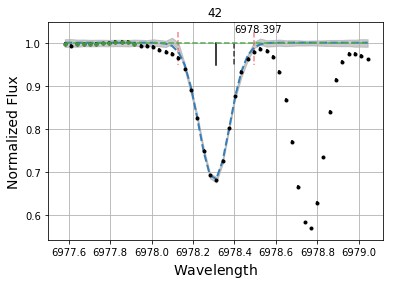

59.46 0.51 simps-int: 58.74 6.49
line to measure: 6979.795


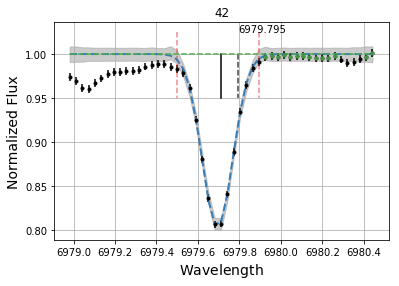

36.52 0.54 simps-int: 35.93 4.61
line to measure: 7111.469


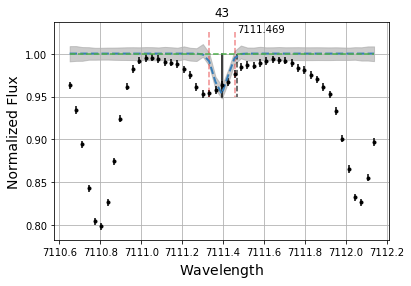

3.7 0.33 simps-int: 3.64 0.64
line to measure: 7113.179


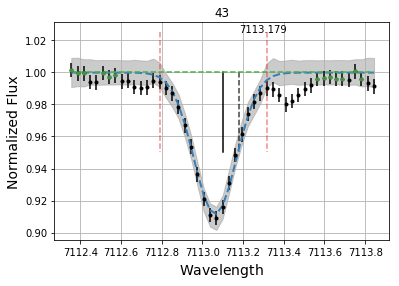

23.18 1.53 simps-int: 22.71 4.57
line to measure: 7138.906


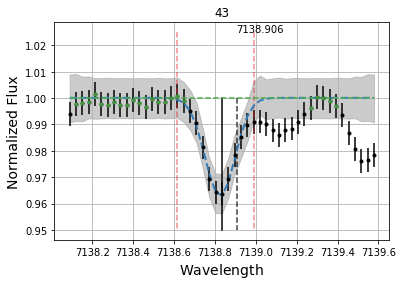

6.81 0.59 simps-int: 6.76 0.88
line to measure: 7326.145


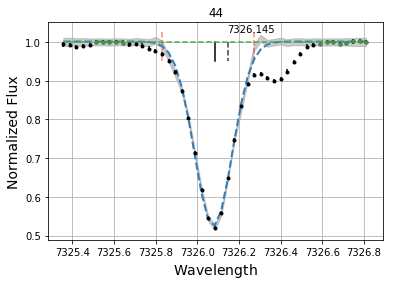

108.08 0.71 simps-int: 108.07 0.71
line to measure: 7468.313


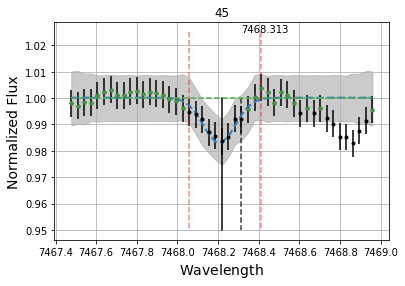

3.29 0.92 simps-int: 3.01 1.3
line to measure: 7405.772


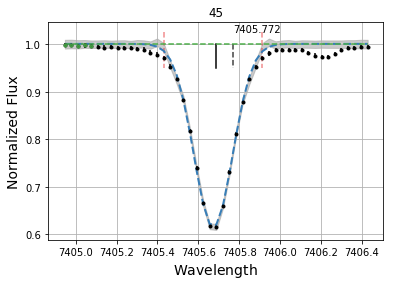

91.71 0.69 simps-int: 91.7 0.69
line to measure: 7400.249


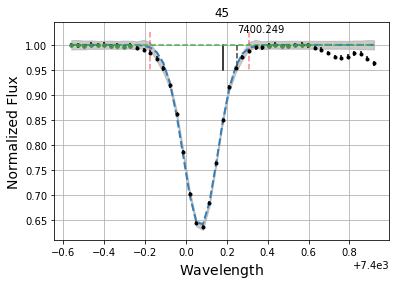

76.25 0.65 simps-int: 76.25 0.65
line to measure: 7775.39


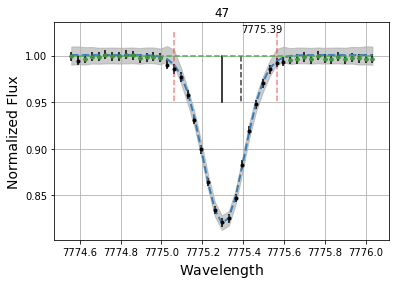

45.63 0.83 simps-int: 45.63 0.83
line to measure: 7774.17


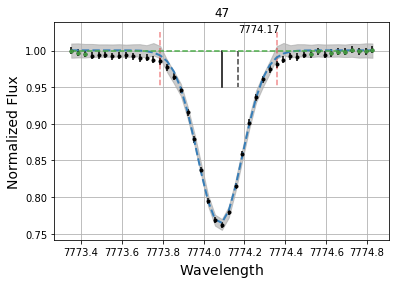

65.17 0.85 simps-int: 65.17 0.85
line to measure: 7771.94


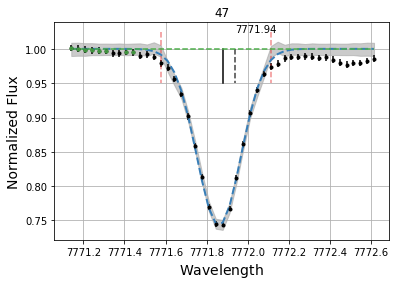

69.85 0.84 simps-int: 69.85 0.84
line to measure: 7698.98


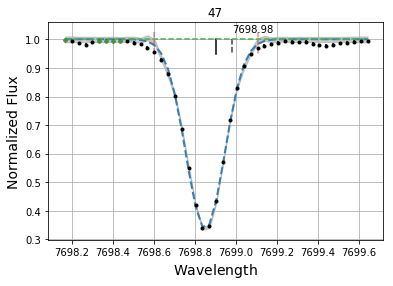

156.55 0.76 simps-int: 156.54 0.76
CPU times: user 1min 38s, sys: 619 ms, total: 1min 38s
Wall time: 1min 17s


In [21]:
%%time
plot_lines = Sun.lines
ex_params = {4695.443:[0,0,4695.5,0],
             4722.153:[0,4721.8,4722.4,0],
             5052.167:[0,5051.95,5052.4,0],
             5380.337:[0,0,5380.4,0],
             5682.633:[0,5682.45,5682.8,0],
             6093.143:[0,6092.9,6093.3,0],
             6133.963:[-0.001,0,0,0],
             6300.304:[-0.005,0,6300.4,0],
             6244.466:[0,6244.25,6244.55,0],
             6224.529:[0.009,6224.2,6224.6,0],
             6414.98:[0,6414.75,6415.1,0],
             6741.628:[0,6741.4,6741.7,0],
             6757.171:[-0.005,6756.97,6757.4,0],
             #6965.409:[-0.005,6965.12,6965.6,0], line largely affected by other lines on both sides, high delavg
             7111.469:[0,7111.1,7111.5,7111.3],
             5846.986:[0.01,5846.78,5847.08,0],
             6243.815:[0.007,0,0,0],
             6243.105:[0.005,0,0,0],
             6320.851:[-0.005,0,0,0],
             7468.313:[-0.002,7468.0,7468.45,0],
             6841.19:[0.002,6841.13,6841.6,0],
             5708.4:[0.005,5708.15,5708.52,0],
             4694.113:[-0.003,4693.97,4694.2,0],
             5711.088:[0,5710.8,5711.2,0],
             5701.104:[-0.002,5700.8,5701.3,0],
             7405.772:[0,7405.42,7405.9,0],
             7003.569:[0,7003.3,7003.65,7003.5],
             5782.127:[0,5781.9,5782.45,0]}
             
             
             
#line 5064.653 causes an error in the GP fit part of the code 
exclude_lines = np.array([6965.409,5064.653])
Sun.measure_all_ew(exclude_lines = exclude_lines, plot_lines = plot_lines)

In [49]:
for i in range(len(Sun.lines)):
    print(Sun.lines[i], Sun.lines_ew[i], Sun.lines_ew_err[i])

5052.167 28.00383566174573 0.5904982925350001
5380.337 16.615153709478385 0.46254346405751345
6587.61 12.86829809423964 0.6411387923695863
7111.469 3.694455388124968 0.3223529260264948
7113.179 23.294532453204692 0.7377086392620309
7468.313 3.463225315579174 2.2140026486700783
6300.304 3.5560430030633445 7.7924836835385145
7775.39 45.662887272229554 0.7769894366454598
7774.17 65.22766177212084 0.8268967272055129
7771.94 69.871159255948 0.8157989027758665
5682.633 105.57643589837774 0.6441327214079364
6154.226 36.444580410529184 0.5245899044976619
6160.747 52.75395112356003 0.5013918938851274
5711.088 104.60976398522831 0.6217012387951742
4730.029 65.91978729298772 0.5488966401365692
6965.409 0.0 nan
6841.19 67.5117634683685 0.5351679270731599
6696.023 37.45343946447694 0.5709301673713958
6698.673 21.08821138004971 0.5588678539841382
5701.104 34.75970829018396 0.6083356019275715
5690.425 49.97834829277417 0.546558671867849
5708.4 74.28566686546272 3.203188158585457
5772.149 52.996075014

In [50]:
Sun.check_for_flags()

5052.167 might have a bad fit 0.0032241262223498862
5380.337 might have a bad fit 0.002102909141459887
7468.313 has more than a 10% error 2.21
6300.304 has more than a 10% error 7.79
5682.633 might have a bad fit 0.020317340765139923
5711.088 might have a bad fit 0.0024192038088396675
4730.029 might have a bad fit 0.0023435884979091407
6965.409 might be too shallow 0.0
6841.19 might have a bad fit 0.0028566962736461727
5708.4 might have a bad fit 0.004591401292723233
7405.772 might have a bad fit 0.0011454240855671954
6414.98 might have a bad fit 0.001050295141021229
4694.113 might have a bad fit 0.001130455656531564
7698.98 might have a bad fit 0.00242529016543872
6169.563 might have a bad fit 0.002272910856276907
7326.145 might have a bad fit 0.004141101276850262
5039.957 might have a bad fit 0.002120790939687207
5210.385 might have a bad fit 0.002075476914112646
5064.653 might be too shallow 0.0
5024.844 might have a bad fit 0.0016423828724218578
5022.868 might have a bad fit 0.0013

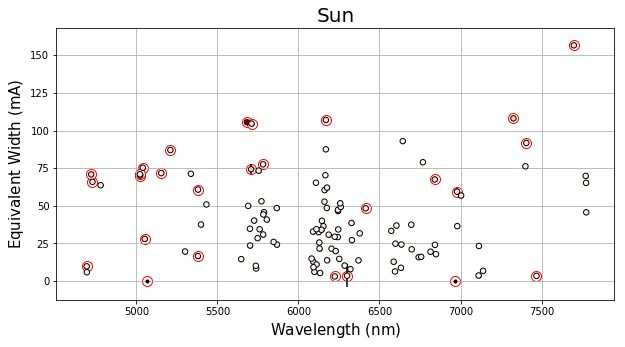

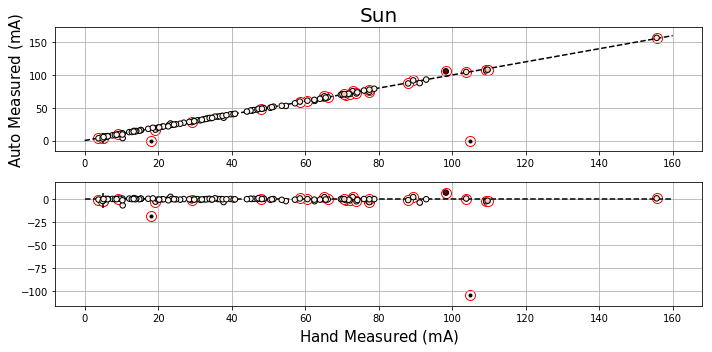

In [51]:
plot_line_info(Sun,'Sun')
plot_comparison_res(Sun,ews,'Sun',xy=[0,160])